# HIRING MODEL

Hiring Model ipums@umn.edu Thu, Nov 28, 12:31 PM (2 days ago) to me Your Higher Ed extract is ready. To retrieve your data, codebook, and command files, go to the link below. Account: naeemahaz@gmail.com Extract: 2 Link: https://highered.ipums.org/highered-action/extract_requests/download Publications and research reports based on the Higher Ed database must cite it appropriately. The citation should include the following: Minnesota Population Center. IPUMS Higher Ed: Version 1.0 [dataset]. Minneapolis, MN: University of Minnesota, 2016. https://doi.org/10.18128/D100.V1.0 For policy briefs or articles in the popular press that use the Higher Ed database, we recommend that you cite the use of Higher Ed data as follows: Higher Ed, University of Minnesota, www.ipums.org Thank you for your support. Sincerely, The Higher Ed Team

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
#import sys
import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
import sklearn as sk
plt.style.use('ggplot')
#import pydotplus
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
person = pd.read_csv('persondata.csv')
education = pd.read_csv('education.csv')
work = pd.read_csv('employnewdb.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# PERSONAL

In [3]:
person.head()

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
0,20901QY86,2010,37,Male,No,Asian,Not in the US,No,None,One child
1,20902AN23,2013,44,Male,No,White,Not in the US,No,None,Two or more children
2,20902EJ96,2013,51,Male,No,Asian,United States,Yes,Born in US or US territories,None
3,20902KP93,2013,49,Female,No,White,Not in the US,Yes,By naturalization,None
4,20902TH37,2013,45,Male,Yes,Under-represented minorities,Not in the US,No,None,None


In [4]:
person.columns

Index(['REFID', 'YEAR', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN'], dtype='object')

In [5]:
persondb = pd.DataFrame(person)

In [6]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89682 entries, 0 to 89681
Data columns (total 10 columns):
REFID              89682 non-null object
YEAR               89682 non-null int64
AGE                89682 non-null int64
GENDER             89682 non-null object
MINORITY           89682 non-null object
RACE               89682 non-null object
BIRTH_PLACE        89682 non-null object
US_CITIZENSHIP     89682 non-null object
US_CITIZEN_TYPE    89682 non-null object
TOTAL_CHILDREN     89682 non-null object
dtypes: int64(2), object(8)
memory usage: 6.8+ MB


In [7]:
person.describe()

,YEAR,AGE
count,89682.000000,89682.000000
mean,2011.635679,43.298733
std,1.493859,13.907259
min,2010.000000,23.000000
25%,2010.000000,30.000000
50%,2013.000000,41.000000
75%,2013.000000,55.000000
max,2013.000000,75.000000


In [8]:
person.sample(5)

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
22696,E11052917,2013,63,Female,No,White,United States,Yes,Born in US or US territories,None
78010,500412396,2010,67,Male,No,White,United States,Yes,Born in US or US territories,None
5261,B10040238,2010,28,Male,No,White,United States,Yes,Born in US or US territories,None
66031,500301857,2010,52,Female,Yes,Under-represented minorities,United States,Yes,Born in US or US territories,One child
61647,E11757879,2013,36,Female,No,White,Not in the US,Yes,Born abroad of American parents,One child


There are 10 columns and 89682 records in the person dataset.  The dataset shows the information of a person.  The Gender, Race, Birthplace, US Status, Age and how many children.  

1) Is Race skew? 

2) Is Gender skew? 

3) Is Age skew? 

4) Is Citzen skew? 



In [9]:
persondb['AGE'].mean()

43.298733302111906

In [10]:
persondb['AGE'].min()

23

In [11]:
persondb['AGE'].max()

75

In [12]:
race = persondb.pivot_table(index=['RACE'], values=['REFID'], aggfunc='count')

In [13]:
race

,REFID
RACE,
Asian,15626
Under-represented minorities,19699
White,54357


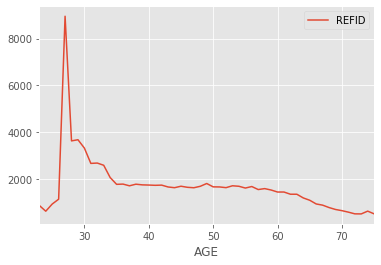

In [14]:
age = persondb.pivot_table(index=['AGE'], values=['REFID'], aggfunc='count').plot()

In [15]:
ustype = persondb.pivot_table(index=['US_CITIZEN_TYPE'], values=['REFID'], aggfunc='count')

In [16]:
ustype

,REFID
US_CITIZEN_TYPE,
Born abroad of American parents,1238
Born in US or US territories,65901
By naturalization,13347
None,9196


In [17]:
us = persondb.pivot_table(index=['US_CITIZENSHIP','GENDER','RACE'], values=['REFID'], aggfunc='count')

In [18]:
us

REFID
US_CITIZENSHIP GENDER RACE                               
No             Female Asian                          2067
                      Under-represented minorities    571
                      White                           919
               Male   Asian                          3097
                      Under-represented minorities    943
                      White                          1599
Yes            Female Asian                          4570
                      Under-represented minorities   9813
                      White                         21644
               Male   Asian                          5892
                      Under-represented minorities   8372
                      White                         30195

In [19]:
gender = persondb.pivot_table(index=['GENDER','RACE'], values=['REFID'], aggfunc='count')

In [20]:
gender

REFID
GENDER RACE                               
Female Asian                          6637
       Under-represented minorities  10384
       White                         22563
Male   Asian                          8989
       Under-represented minorities   9315
       White                         31794

In [21]:
kidsus = persondb.pivot_table(index=['US_CITIZEN_TYPE','TOTAL_CHILDREN'], values=['REFID'], aggfunc='count')

In [22]:
kidsus

REFID
US_CITIZEN_TYPE                 TOTAL_CHILDREN             
Born abroad of American parents None                    702
                                One child               215
                                Two or more children    321
Born in US or US territories    None                  39797
                                One child             10563
                                Two or more children  15541
By naturalization               None                   6497
                                One child              2615
                                Two or more children   4235
None                            None                   5253
                                One child              1934
                                Two or more children   2009

In [23]:
kidsus = persondb.pivot_table(index=['GENDER','TOTAL_CHILDREN'], values=['REFID'], aggfunc='count')

# GRAHPS

In [24]:
#studyyear = person.groupby(['YEAR'])['REFID'].count()

#fig= plt.figure(figsize=(5,5))
#studyyear.plot(kind='bar')
#plt.show()

#personyear_count = person['YEAR'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(personyear_count.index, personyear_count.values, alpha=0.9)
#plt.title('Sample Years in Personal Dataset')
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Sample Years', fontsize=12)
#plt.show()

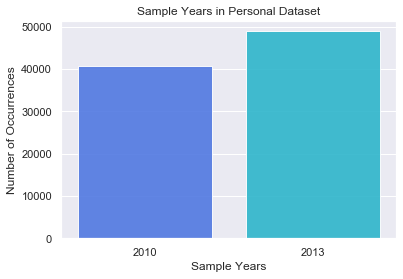

In [25]:
personyear_count = person['YEAR'].value_counts()
sns.set(palette='rainbow')
sns.barplot(personyear_count.index, personyear_count.values, alpha=0.9)
plt.title('Sample Years in Personal Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sample Years', fontsize=12)
plt.show()

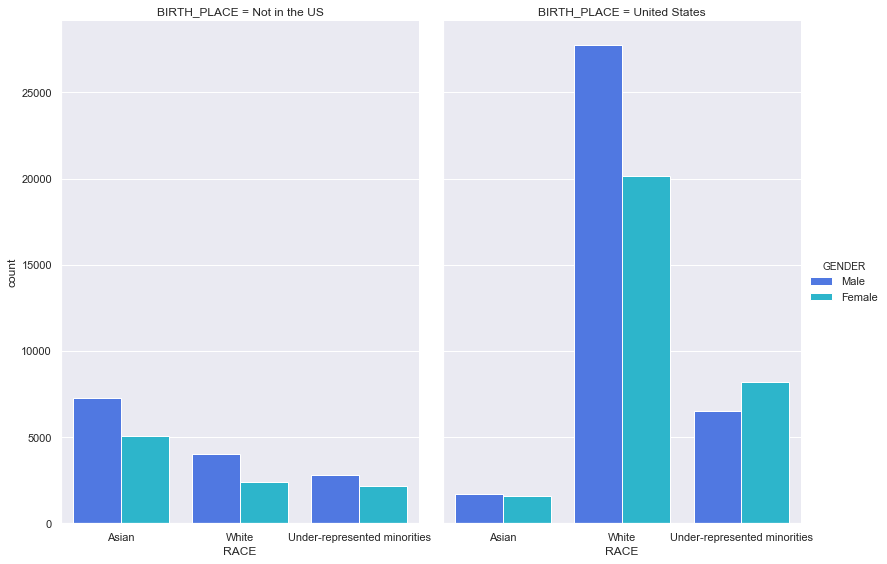

In [26]:
race = sns.catplot(x="RACE", hue="GENDER", col="BIRTH_PLACE",
               data=person, kind="count",
               height=8, aspect=.7)

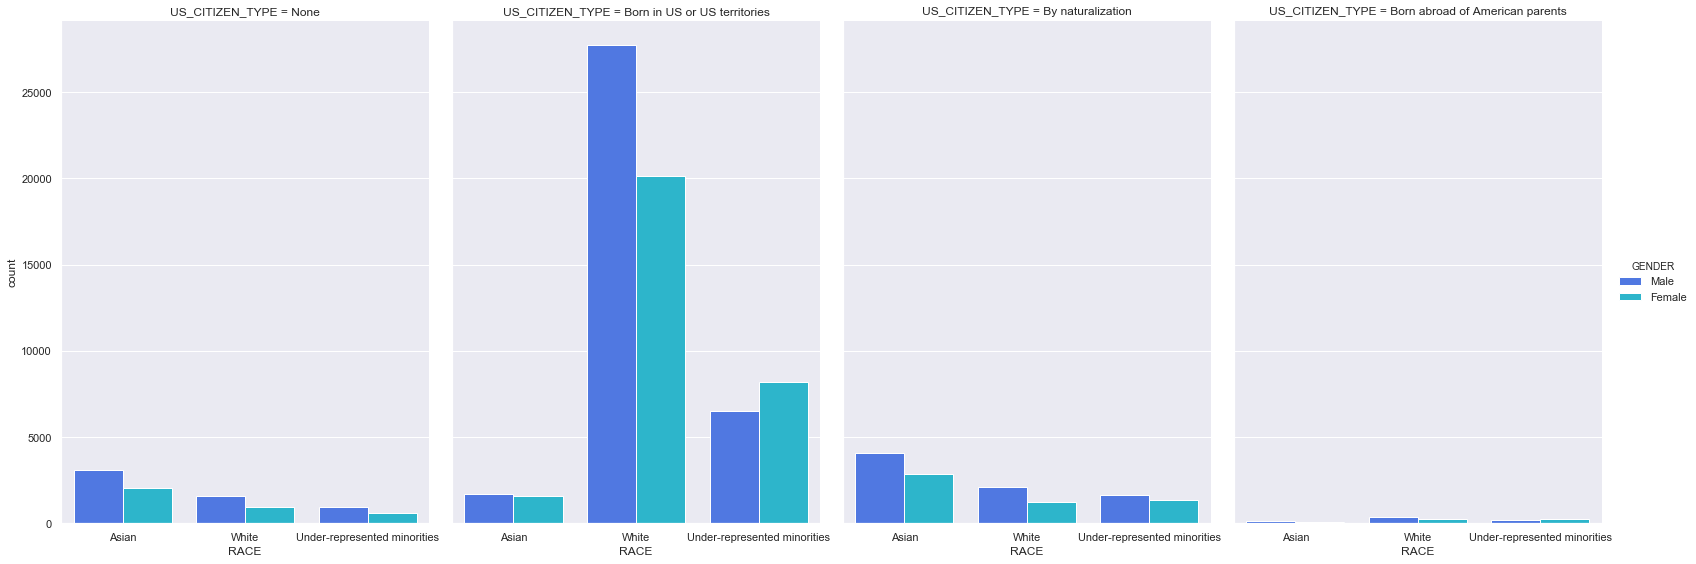

In [27]:
ustype = sns.catplot(x="RACE", hue="GENDER", col="US_CITIZEN_TYPE",
               data=person, kind="count",
               height=8, aspect=.7)

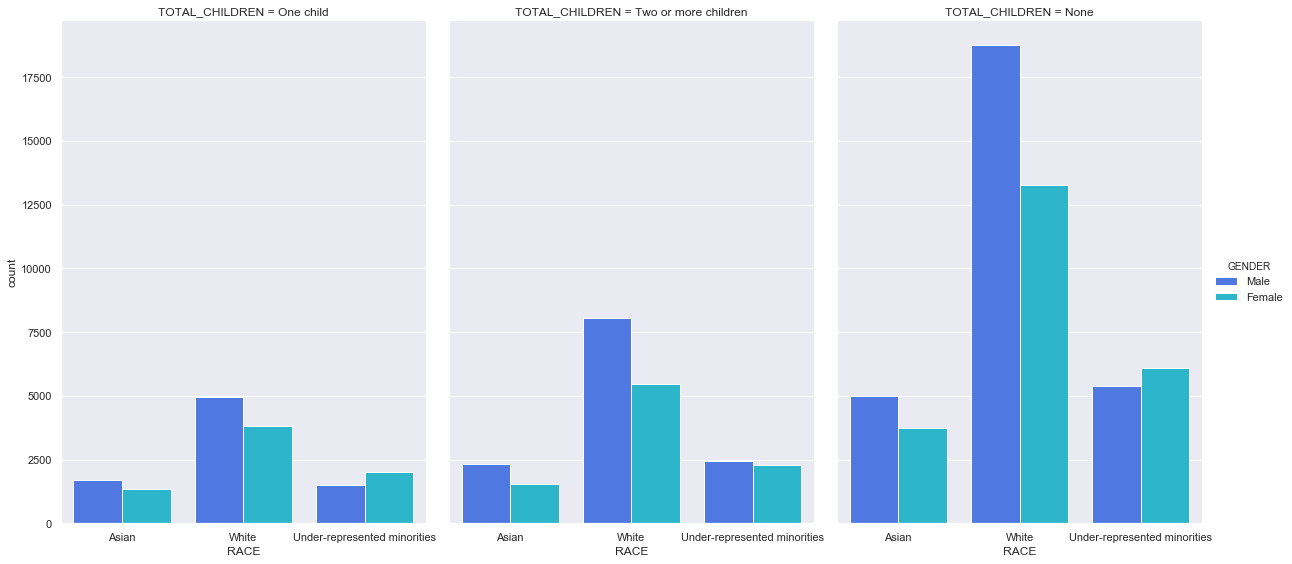

In [28]:
kids = sns.catplot(x="RACE", hue="GENDER", col="TOTAL_CHILDREN",
               data=person, kind="count",
               height=8, aspect=.7)

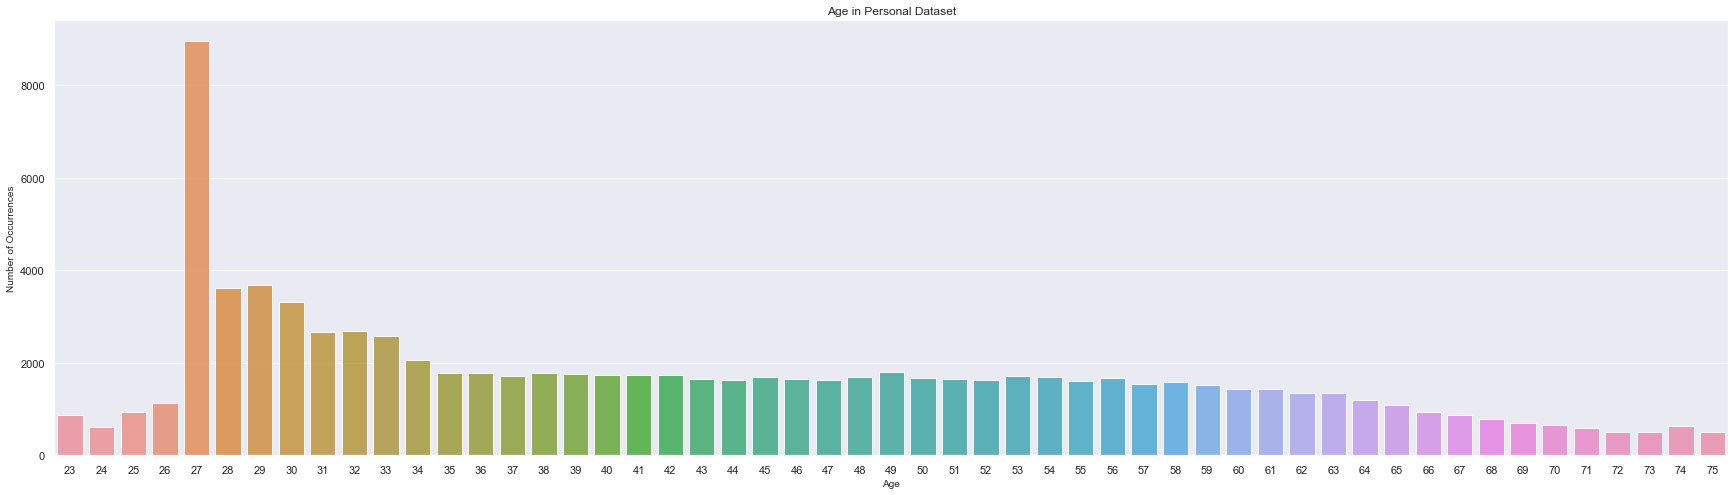

In [29]:
AGE_count = person['AGE'].value_counts()

fig= plt.figure(figsize=(30,8))
sns.set(style="darkgrid")
sns.barplot(AGE_count.index, AGE_count.values, alpha=0.9)
plt.title('Age in Personal Dataset')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Age', fontsize=10)
plt.show()

In [30]:
persondb.describe(include='all')

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
count,89682,89682.000000,89682.000000,89682,89682,89682,89682,89682,89682,89682
unique,89682,NaN,NaN,2,2,3,2,2,4,3
top,500420480,NaN,NaN,Male,No,White,United States,Yes,Born in US or US territories,None
freq,1,NaN,NaN,50098,69983,54357,65924,80486,65901,52249
mean,NaN,2011.635679,43.298733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.493859,13.907259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2010.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
persondb.columns

Index(['REFID', 'YEAR', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN'], dtype='object')

In [32]:
perdata = persondb[['REFID','AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN']]

# PERSONAL DATASET

# EDUCATION

What are the reasons for a person aquire an education?  

What are the fields? 

What are the reasons?

What is the degree? 


In [33]:
education.head()

,Unnamed: 0,REFID,YEAR,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
0,0,500300006,2010,Engineering,Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No
1,1,500300014,2010,Social and related sciences,Master,Psychology,Social and related sciences,Master,Psychology,Social and related sciences,None,No,No,No,No,No,No,No,No
2,2,500300018,2010,Social and related sciences,Master,Other science and engineering-related,Science and engineering-related fields,Master,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
3,3,500300035,2010,Social and related sciences,Professional,Other non-science and engineering,Non-science and engineering fields,Professional,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
4,4,500300038,2010,Non-science and engineering fields,Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No


In [34]:
edu = education

In [35]:
edu = edu.drop(['Unnamed: 0'], axis=1)

In [36]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89680 entries, 0 to 89679
Data columns (total 18 columns):
REFID                                      89680 non-null object
YEAR                                       89680 non-null int64
FIELD_MAJOR_GROUP_BACHELOR_DEGREE          86660 non-null object
HIGHEST_DEGREE                             89680 non-null object
FIELD_MAJOR_HIGHEST_DEGREE                 89680 non-null object
FIELD_MAJOR_GROUP_HIGHEST_DEGREE           89680 non-null object
RECENT_DEGREE                              89680 non-null object
FIELD_MAJOR_RECENT_DEGREE                  88198 non-null object
FIELD_MAJOR_GROUP_RECENT_DEGREE            89680 non-null object
STUDENT_STATUS                             89680 non-null object
REASON_EDUCATION_ADVANCE_OPPORTUNITIES     89680 non-null object
REASON_EDUCATION_BEFORE_CAREER             89680 non-null object
REASON_EDUCATION_CHANGE_CAREER             89680 non-null object
REASON_EDUCATION_PERSONAL                  8968

In [37]:
edu.sample(10)

,REFID,YEAR,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
63143,E11389723,2013,Science and engineering-related fields,Bachelor,Other science and engineering-related,Science and engineering-related fields,Bachelor,Other science and engineering-related,Science and engineering-related fields,"Not enrolled in a degree program, but taking c...",No,No,No,No,Yes,No,No,Yes
68292,E11483328,2013,Social and related sciences,Master,Economics,Social and related sciences,Master,Economics,Social and related sciences,Full-Time,Yes,No,No,Yes,No,No,Yes,No
21173,500494880,2010,Engineering,Bachelor,Other engineering,Engineering,Bachelor,Other engineering,Engineering,None,No,No,No,No,No,No,No,No
78674,E11667722,2013,Non-science and engineering fields,Bachelor,Management and administration,Non-science and engineering fields,Bachelor,Management and administration,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
42573,D09638287,2013,"Biological, agricultural and environmental lif...",Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",Part-Time,No,No,No,No,Yes,Yes,No,No
37214,C10007734,2010,Science and engineering-related fields,Master,Health-related fields,Science and engineering-related fields,Master,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
78198,E11659414,2013,Social and related sciences,Master,Other non-science and engineering,Non-science and engineering fields,Master,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
84930,E11773819,2013,Social and related sciences,Bachelor,Political and related sciences,Social and related sciences,Bachelor,Political and related sciences,Social and related sciences,None,No,No,No,No,No,No,No,No
18121,500468025,2010,"Biological, agricultural and environmental lif...",Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No
80097,E11692266,2013,"Biological, agricultural and environmental lif...",Master,Computer and mathematical science,Computer and mathematical sciences,Master,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No


In [38]:
edu.columns

Index(['REFID', 'YEAR', 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE', 'HIGHEST_DEGREE', 'FIELD_MAJOR_HIGHEST_DEGREE', 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [39]:
edu['FIELD_MAJOR_GROUP_BACHELOR_DEGREE'].fillna("No")

0                                              Engineering
1                              Social and related sciences
2                              Social and related sciences
3                              Social and related sciences
4                       Non-science and engineering fields
5                       Computer and mathematical sciences
6        Biological, agricultural and environmental lif...
7                                              Engineering
8                       Non-science and engineering fields
9                                              Engineering
10       Biological, agricultural and environmental lif...
11                             Social and related sciences
12       Biological, agricultural and environmental lif...
13                  Science and engineering-related fields
14                             Social and related sciences
15                      Computer and mathematical sciences
16                  Science and engineering-related fiel

In [40]:
edu.columns

Index(['REFID', 'YEAR', 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE', 'HIGHEST_DEGREE', 'FIELD_MAJOR_HIGHEST_DEGREE', 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [41]:
edudb = pd.DataFrame(edu)

In [42]:
edudata = edudb[['REFID', 'YEAR','RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

In [43]:
edudata.sample(10)

,REFID,YEAR,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
64532,E11414588,2013,Bachelor,Computer and mathematical science,Computer and mathematical sciences,Part-Time,No,No,No,No,No,Yes,Yes,Yes
16816,500456397,2010,Bachelor,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
17661,500463731,2010,Bachelor,Psychology,Social and related sciences,None,No,No,No,No,No,No,No,No
87417,E11816949,2013,Bachelor,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
43550,E11022720,2013,Bachelor,Chemical engineering,Engineering,None,No,No,No,No,No,No,No,No
70032,E11514882,2013,Master,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
13758,500427560,2010,Master,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No
2671,500327198,2010,Bachelor,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
36238,D09564830,2010,Master,Chemical engineering,Engineering,None,No,No,No,No,No,No,No,No
24631,A06367809,2010,Bachelor,Psychology,Social and related sciences,None,No,No,No,No,No,No,No,No


In [44]:
recentdegree= edudata.pivot_table(index=['RECENT_DEGREE'], values=['REFID'], aggfunc='count')

In [45]:
recentdegree

,REFID
RECENT_DEGREE,
Bachelor,48504
Doctorate,3040
Master,31850
No Degree,1471
Professional,4815


In [46]:
reasonsdegree = edudata[['RECENT_DEGREE','REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

In [47]:
reasonsdegree.sample(10)

,RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
73342,Professional,No,No,No,No,No,No,No,No
49390,Bachelor,No,No,No,No,No,No,No,No
7623,Master,No,No,No,No,No,No,No,No
1022,Master,No,No,No,No,No,No,No,No
29857,Professional,No,No,No,No,No,No,No,No
88154,Bachelor,Yes,Yes,No,No,No,Yes,Yes,Yes
37767,Bachelor,Yes,Yes,No,Yes,No,Yes,Yes,No
62160,Bachelor,No,No,No,No,No,No,No,No
80719,Bachelor,No,No,No,No,No,No,No,No
88764,No Degree,No,No,No,No,No,No,No,No


In [48]:
reasonedu = edudata.pivot_table(index=['REASON_EDUCATION_ADVANCE_OPPORTUNITIES'], values=['REFID'], aggfunc='count')

In [49]:
reasonedu

,REFID
REASON_EDUCATION_ADVANCE_OPPORTUNITIES,
No,83111
Yes,6569


In [50]:
reasonbeforecareer = edudata.pivot_table(index=['REASON_EDUCATION_BEFORE_CAREER'], values=['REFID'], aggfunc='count')

In [51]:
reasonbeforecareer

,REFID
REASON_EDUCATION_BEFORE_CAREER,
No,83681
Yes,5999


In [52]:
reasonchange = edudata.pivot_table(index=['REASON_EDUCATION_CHANGE_CAREER'], values=['REFID'], aggfunc='count')

In [53]:
reasonchange

,REFID
REASON_EDUCATION_CHANGE_CAREER,
No,86649
Yes,3031


In [54]:
reasonper = edudata.pivot_table(index=['REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [55]:
reasonper

,REFID
REASON_EDUCATION_PERSONAL,
No,85680
Yes,4000


In [56]:
reasoncert = edudata.pivot_table(index=['REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [57]:
reasoncert

,REFID
REASON_EDUCATION_PERSONAL,
No,85680
Yes,4000


In [58]:
reasonemp = edudata.pivot_table(index=['REASON_EDUCATION_BY_EMPLOYER'], values=['REFID'], aggfunc='count')

In [59]:
reasonemp

,REFID
REASON_EDUCATION_BY_EMPLOYER,
No,85609
Yes,4071


In [60]:
reasonskill = edudata.pivot_table(index=['REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD'], values=['REFID'], aggfunc='count')

In [61]:
reasonskill

,REFID
REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,
No,82446
Yes,7234


In [62]:
reasonpaidemp = edudb.pivot_table(index=['REASON_EDUCATION_PAID_BY_EMPLOYER'], values=['REFID'], aggfunc='count')

In [63]:
reasonpaidemp

,REFID
REASON_EDUCATION_PAID_BY_EMPLOYER,
No,85940
Yes,3740


# GRAPHS

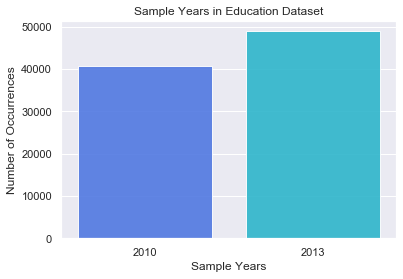

In [64]:
eduyear_count = edudata['YEAR'].value_counts()
sns.set(palette='rainbow')
sns.barplot(eduyear_count.index, eduyear_count.values, alpha=0.9)
plt.title('Sample Years in Education Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sample Years', fontsize=12)
plt.show()

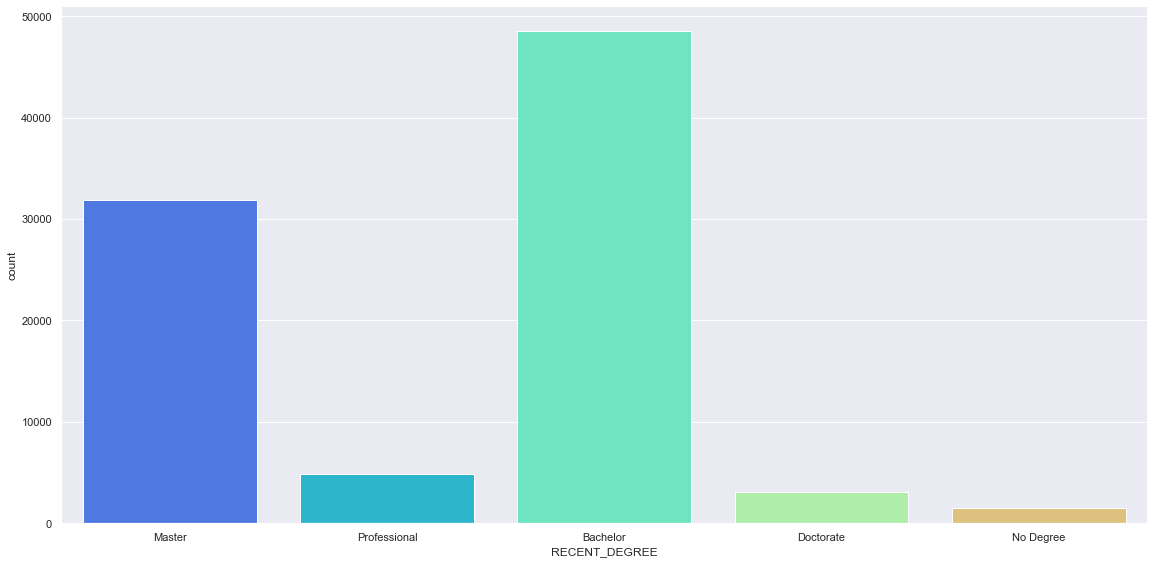

In [65]:
degreeme = sns.catplot(x="RECENT_DEGREE",
               data=edudata, kind="count",
               height=8, aspect=2)

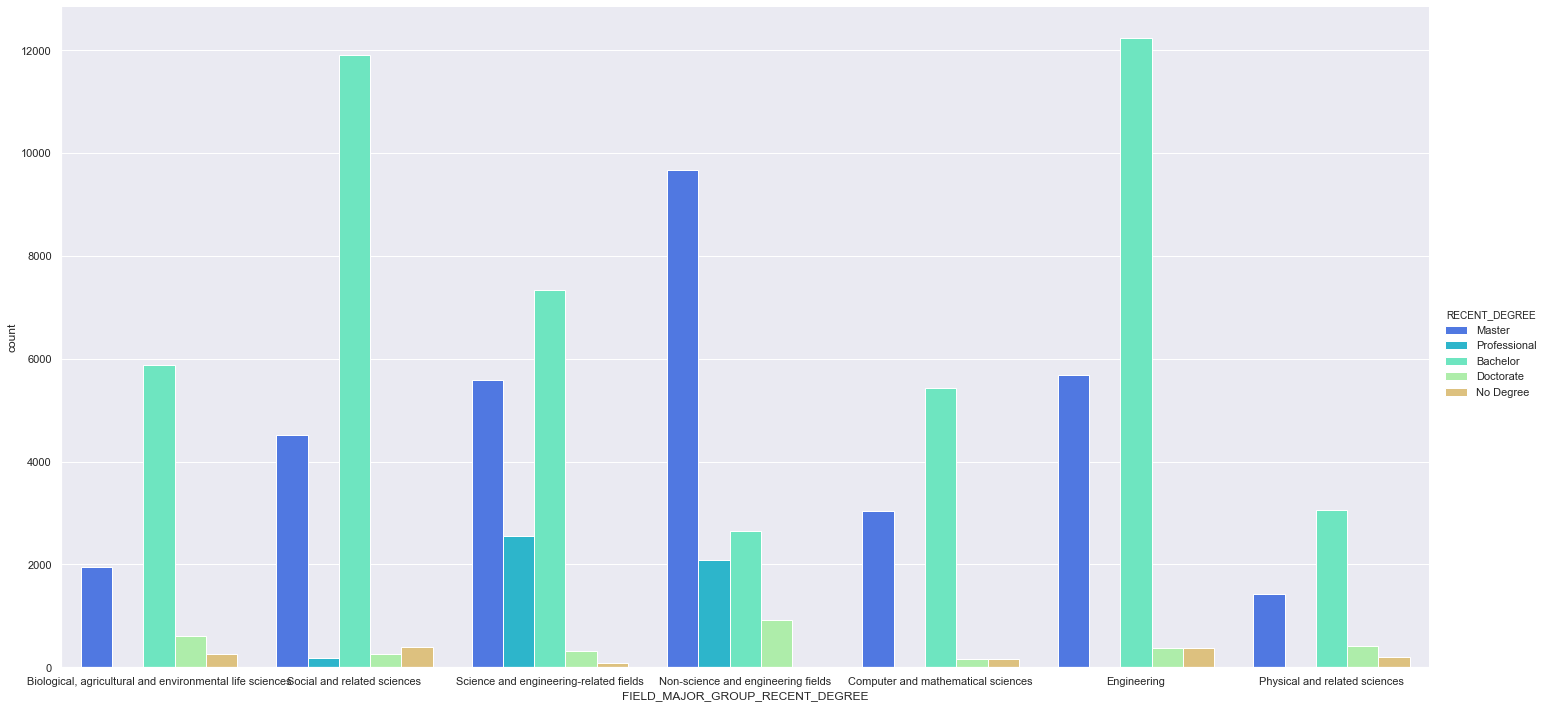

In [66]:
degreeme = sns.catplot(x="FIELD_MAJOR_GROUP_RECENT_DEGREE", hue="RECENT_DEGREE",
               data=edudata, kind="count",
               height=10, aspect=2)

In [67]:
edudata.describe(include='all')

,REFID,YEAR,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
count,89680,89680.000000,89680,88198,89680,89680,89680,89680,89680,89680,89680,89680,89680,89680
unique,89680,NaN,5,19,7,4,2,2,2,2,2,2,2,2
top,500420480,NaN,Bachelor,Health-related fields,Engineering,None,No,No,No,No,No,No,No,No
freq,1,NaN,48504,11692,18646,80074,83111,83681,86649,85680,86465,85609,82446,85940
mean,NaN,2011.635682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.493859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#reasonme = edu.groupby(['REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'])

In [69]:
reason = edu.groupby(['REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL'])['REFID'].count()

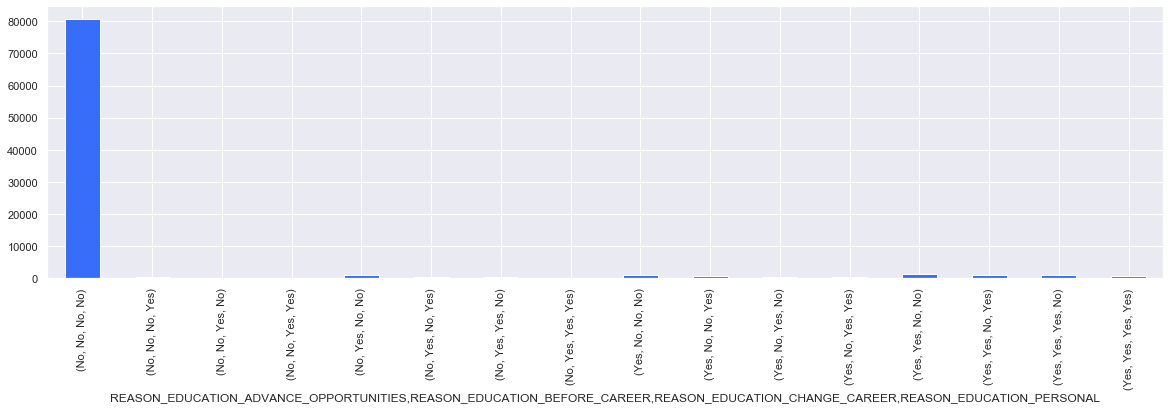

In [70]:
fig= plt.figure(figsize=(20,5))
reason.plot(kind='bar')
plt.show()

In [71]:
reas = edu[['REFID','REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL']]

In [72]:
reasonnow = edudata.pivot_table(index=['REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [73]:
reasonnow

REFID
REASON_EDUCATION_ADVANCE_OPPORTUNITIES REASON_EDUCATION_BEFORE_CAREER REASON_EDUCATION_CHANGE_CAREER REASON_EDUCATION_PERSONAL       
No                                     No                             No                             No                         80626
                                                                                                     Yes                          492
                                                                      Yes                            No                           188
                                                                                                     Yes                           73
                                       Yes                            No                             No                           884
                                                                                                     Yes                          317
                                                                      Yes                            No                           335
                                                                                                     Yes                          196
Yes                                    No                             No                             No                          1042
                                                                                                     Yes                          723
                                                                      Yes                            No                           303
                                                                                                     Yes                          234
                                       Yes                            No                             No                          1412
                                                                                                     Yes                         1153
                                                                      Yes                            No                           890
                                                                                                     Yes                          812

In [74]:
reasonnow.transpose()

REASON_EDUCATION_ADVANCE_OPPORTUNITIES     No                                     Yes                                     
REASON_EDUCATION_BEFORE_CAREER             No                Yes                   No                  Yes                
REASON_EDUCATION_CHANGE_CAREER             No       Yes       No       Yes         No       Yes         No        Yes     
REASON_EDUCATION_PERSONAL                  No  Yes   No Yes   No  Yes   No  Yes    No  Yes   No  Yes    No   Yes   No  Yes
REFID                                   80626  492  188  73  884  317  335  196  1042  723  303  234  1412  1153  890  812

In [75]:
reasonfor = edudata[['REFID','REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL']]

In [76]:
reasonfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89680 entries, 0 to 89679
Data columns (total 5 columns):
REFID                                     89680 non-null object
REASON_EDUCATION_ADVANCE_OPPORTUNITIES    89680 non-null object
REASON_EDUCATION_BEFORE_CAREER            89680 non-null object
REASON_EDUCATION_CHANGE_CAREER            89680 non-null object
REASON_EDUCATION_PERSONAL                 89680 non-null object
dtypes: object(5)
memory usage: 3.4+ MB


In [77]:
edudata.columns

Index(['REFID', 'YEAR', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [78]:
edudbnew = edudata[['REFID','RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE','REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

# EMPLOYMENT

1) What do an employee look for in a company? 

2) What makes an empployee happy to work for a company? 

3) Do employees use their degrees?  

4) Can an employee without a degree can work? 

5) Does a degree aglin with the type of company? 



In [79]:
work.sample(10)

,REFID,YEAR,LABOR_STATUS,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,LOOKING_FOR_WORK,PARTTIME_BUT_WANT_FULLTIME,PARTTIME_FOR_FAMILY,PARTTIME_NOT_WANT,PARTTIME_NO_FULLTIME,PARTTIME_OTHER,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,SALARY,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,NOT_WORKING_LAYOFF,NOT_WORKING_NO_NEED_TO_WORK,NOT_WORKING_NO_JOB,NOT_WORKING_SICK,NOT_WORKING_STUDENT
74208,E11587649,2013,Employed,Greater than 40 hours,40-52 weeks,Yes,Yes,No,Yes,No,No,No,No,No,No,Closely related,Science and engineering pre-college teachers,Science and engineering related occupations,2 year college or other school system,1000-4999 employees,No,Yes,Yes,No,No,No,No,No,No,No,Teaching,Teaching,No Secondary Activity,No Secondary Activity,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,2 memberships,Yes,"$55,000.00",No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Yes,To facilitate a change in occupation field,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No
28488,B10106062,2010,Employed,Greater than 40 hours,40-52 weeks,Yes,No,No,Yes,No,No,No,No,No,No,Somewhat related,Other engineers,Engineers,4 year college or medical institution,5000-24999 employees,No,Yes,No,No,No,No,No,No,Yes,No,Teaching,Teaching,Basic research,Research and Development,No,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No memberships,No,"$30,000.00",No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat dissatisfied,No,Other,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No
11785,500409031,2010,Not in the labor force,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,Other,None,No,No,No,No,No,No,No,No,No,No,No,No,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No memberships,No,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
11960,500410381,2010,Employed,36 - 40 hours,40-52 weeks,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Closely related,Science and engineer

In [80]:
employ = work

In [81]:
employ.columns

Index(['REFID', 'YEAR', 'LABOR_STATUS', 'HOURS_WORKED', 'WEEKS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'LOOKING_FOR_WORK', 'PARTTIME_BUT_WANT_FULLTIME', 'PARTTIME_FOR_FAMILY', 'PARTTIME_NOT_WANT', 'PARTTIME_NO_FULLTIME', 'PARTTIME_OTHER', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALI

In [82]:
notworking = employ.pivot_table(index=['NOT_WORKING_LAYOFF','NOT_WORKING_NO_NEED_TO_WORK','NOT_WORKING_NO_JOB','NOT_WORKING_SICK','NOT_WORKING_STUDENT'], values=['REFID'], aggfunc='count')

In [83]:
notworking.transpose()

NOT_WORKING_LAYOFF              No                                                                           Yes                                                      
NOT_WORKING_NO_NEED_TO_WORK     No                                      Yes                                   No                               Yes                    
NOT_WORKING_NO_JOB              No                   Yes                 No                 Yes               No               Yes              No         Yes        
NOT_WORKING_SICK                No         Yes        No       Yes       No        Yes       No     Yes       No      Yes       No     Yes      No     Yes  No     Yes
NOT_WORKING_STUDENT             No   Yes    No Yes    No  Yes   No Yes   No  Yes    No Yes   No Yes  No Yes   No Yes   No Yes   No Yes  No Yes  No Yes  No  No Yes  No
REFID                        76245  1406  5766  57  1009  188  330  22  988  245  1445  20  103  36  82   4  839  37  105   3  509  44  93   3  22   3  19  22   5  30

In [84]:
notworkingme = employ.groupby(['NOT_WORKING_LAYOFF','NOT_WORKING_NO_NEED_TO_WORK','NOT_WORKING_NO_JOB','NOT_WORKING_SICK','NOT_WORKING_STUDENT'])['REFID'].count()

In [85]:
employ.columns


Index(['REFID', 'YEAR', 'LABOR_STATUS', 'HOURS_WORKED', 'WEEKS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'LOOKING_FOR_WORK', 'PARTTIME_BUT_WANT_FULLTIME', 'PARTTIME_FOR_FAMILY', 'PARTTIME_NOT_WANT', 'PARTTIME_NO_FULLTIME', 'PARTTIME_OTHER', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALI

In [86]:
havesta = employ[['REFID','HOURS_WORKED', ' SALARY ','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY']]

In [87]:
havesta.sample(10)

,REFID,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY
44477,E11042181,36 - 40 hours,"$75,000.00",Yes,Yes,No,Yes,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied
44664,E11045382,21 - 35 hours,"$26,000.00",No,Yes,No,No,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied
76468,E11627742,20 or less,"$15,000.00",Yes,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied
31249,D09114388,36 - 40 hours,"$94,000.00",Yes,Yes,No,Yes,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied
56878,E11274529,None,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No
9917,500393084,Greater than 40 hours,"$150,000.00",Yes,Yes,Yes,Yes,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied
64224,E11408812,Greater than 40 hours,"$121,000.00",Yes,Yes,No,Yes,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied
16940,500457238,None,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No
21343,500496027,21 - 35 hours,"$58,000.00",Yes,Yes,No,Yes,Somewhat dissatisfied,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied
36830,D09618651,None,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [88]:
havestaworking = havesta[havesta.HOURS_WORKED != "None"]

In [89]:
havestaworking.sample(10)

,REFID,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY
39402,C10166853,20 or less,"$4,000.00",No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,Somewhat satisfied,Somewhat satisfied
85454,E11783206,Greater than 40 hours,"$61,000.00",Yes,No,Yes,Yes,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied
72077,E11551108,21 - 35 hours,"$7,000.00",No,No,No,No,Very satisfied,Somewhat dissatisfied,Very dissatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very dissatisfied,Very dissatisfied,Very satisfied
76753,E11633450,36 - 40 hours,"$50,000.00",Yes,Yes,No,Yes,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very dissatisfied,Very satisfied
17968,500466613,Greater than 40 hours,"$75,000.00",Yes,No,No,Yes,Very satisfied,Very dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied
43472,E11020666,20 or less,"$20,000.00",No,No,No,No,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied
44936,E11050291,21 - 35 hours,$-,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very dissatisfied,Somewhat satisfied,Somewhat satisfied
69940,E11513207,Greater than 40 hours,"$70,000.00",Yes,Yes,Yes,Yes,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied
69865,E11511862,36 - 40 hours,"$55,000.00",Yes,Yes,No,Yes,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very dissatisfied,Very satisfied
62232,E11373461,36 - 40 hours,"$79,000.00",Yes,Yes,No,Yes,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied


In [90]:
employ.columns

Index(['REFID', 'YEAR', 'LABOR_STATUS', 'HOURS_WORKED', 'WEEKS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'LOOKING_FOR_WORK', 'PARTTIME_BUT_WANT_FULLTIME', 'PARTTIME_FOR_FAMILY', 'PARTTIME_NOT_WANT', 'PARTTIME_NO_FULLTIME', 'PARTTIME_OTHER', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALI

In [91]:
working = employ[['REFID', 'YEAR','HOURS_WORKED',' SALARY ','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',  'WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON', 'WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE', 'WORK_OUTSIDE_DEGREE_FOR_WORK_COND', 'WORK_OUTSIDE_DEGREE_FOR_FAMILY', 'WORK_OUTSIDE_DEGREE_FOR_LOC', 'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL', 'WORK_OUTSIDE_DEGREE_FOR_OTHER', 'WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE', 'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'ATTEND_TRAINING_WORK_RELATE', 'ATTEND_TRAINING', 'ATTEND_TRAINING_CHANGE_FIELD', 'ATTEND_TRAINING_BY_EMPLOYER',
       'ATTEND_TRAINING_CERT', 'ATTEND_TRAINING_INCREASE_ADV_CUR', 'ATTEND_TRAINING_OTHER', 'ATTEND_TRAINING_PERSONAL', 'ATTEND_TRAINING_ACQUIRE_SKILL', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES']]

In [92]:
working = working[working.HOURS_WORKED != "None"]

In [93]:
working.sample(6)

,REFID,YEAR,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES
26214,A06519540,2010,Greater than 40 hours,"$67,000.00",Yes,Yes,No,Yes,Somewhat related,"Top and mid-level managers, executives, admini...",Non-science and engineering occupations,2 year college or other school system,500-999 employees,No,No,No,No,No,No,No,No,No,No,Management and Administration,Management and Administration,Employee relations,Management and Administration,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,4 or more memberships,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Yes,To facilitate a change in occupation field,No,Yes,No,No,No,No,Yes,No,Yes,No
5714,500355475,2010,20 or less,"$25,000.00",No,No,No,Yes,Closely related,Non-science and engineering pre-college and po...,Non-science and engineering occupations,2 year college or other school system,10 or fewer employees,No,Yes,Yes,No,No,No,No,No,No,No,Teaching,Teaching,"Sales, purchasing, marketing",Management and Administration,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No memberships,No,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat dissatisfied,Very dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very dissatisfied,Very dissatisfied,Very satisfied,Yes,For certification,No,Yes,Yes,No,No,No,Yes,Yes,No,Yes
13885,500428722,2010,Greater than 40 hours,"$58,000.00",No,No,No,No,Not related,Other Non-science and engineering occupations,Non-science and engineering occupations,Business or industry,25-99 employees,No,No,No,No,No,No,No,No,No,No,"Sales, purchasing, marketing",Management and Administration,Other work activity,Other,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No memberships,No,Family-related reasons,Working conditions,Yes,Yes,Yes,Yes,No,No,No,Very satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Yes,To facilitate a change in occupation field,No,No,No,No,No,No,Yes,No,No,No
31989,D09178078,2010,36 - 40 hours,"$43,000.00",Yes,Y

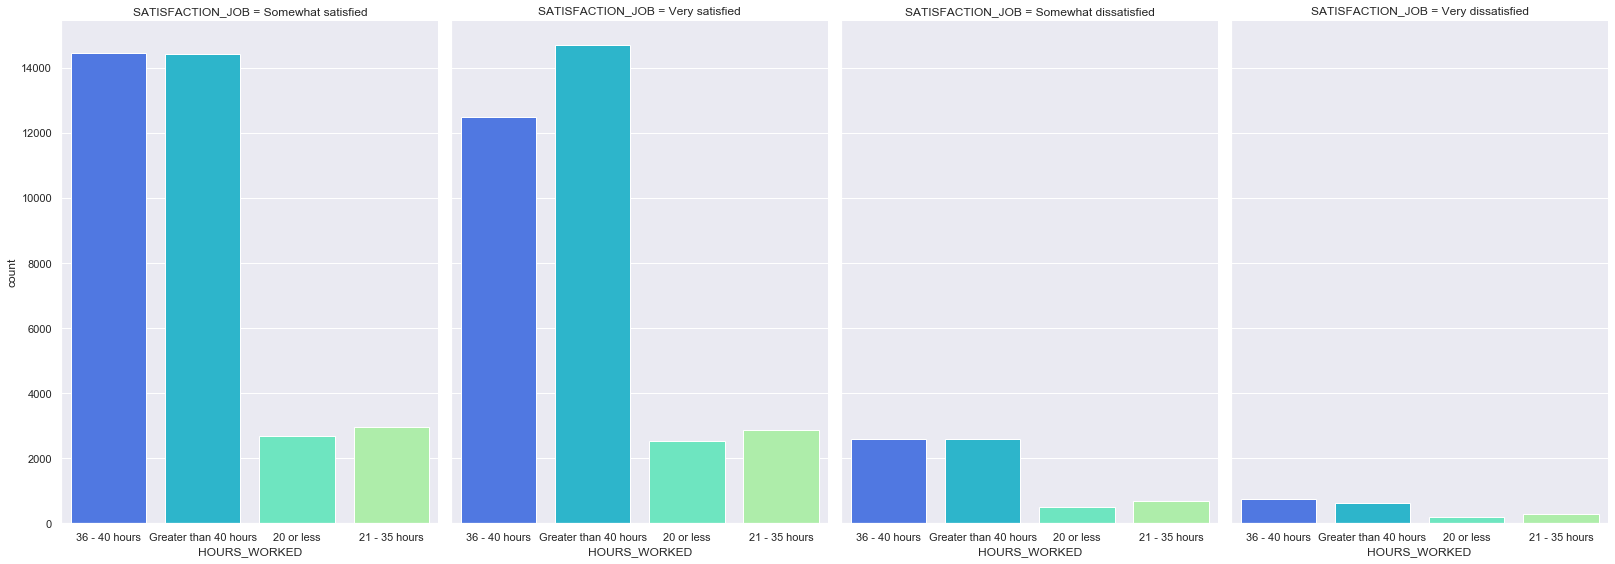

In [94]:
hours = sns.catplot(x="HOURS_WORKED",  col="SATISFACTION_JOB",
               data=working, kind="count",
               height=8, aspect=.7)

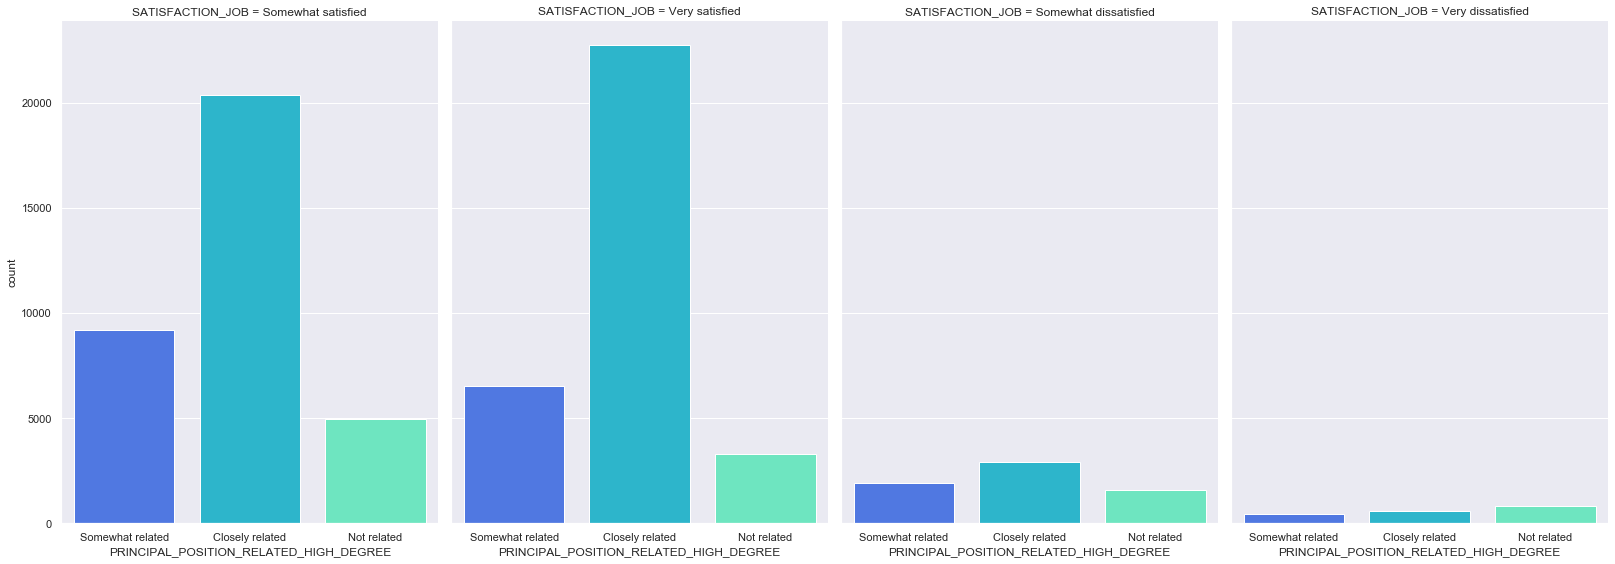

In [95]:
degree = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="SATISFACTION_JOB",
               data=working, kind="count",
               height=8, aspect=.7)

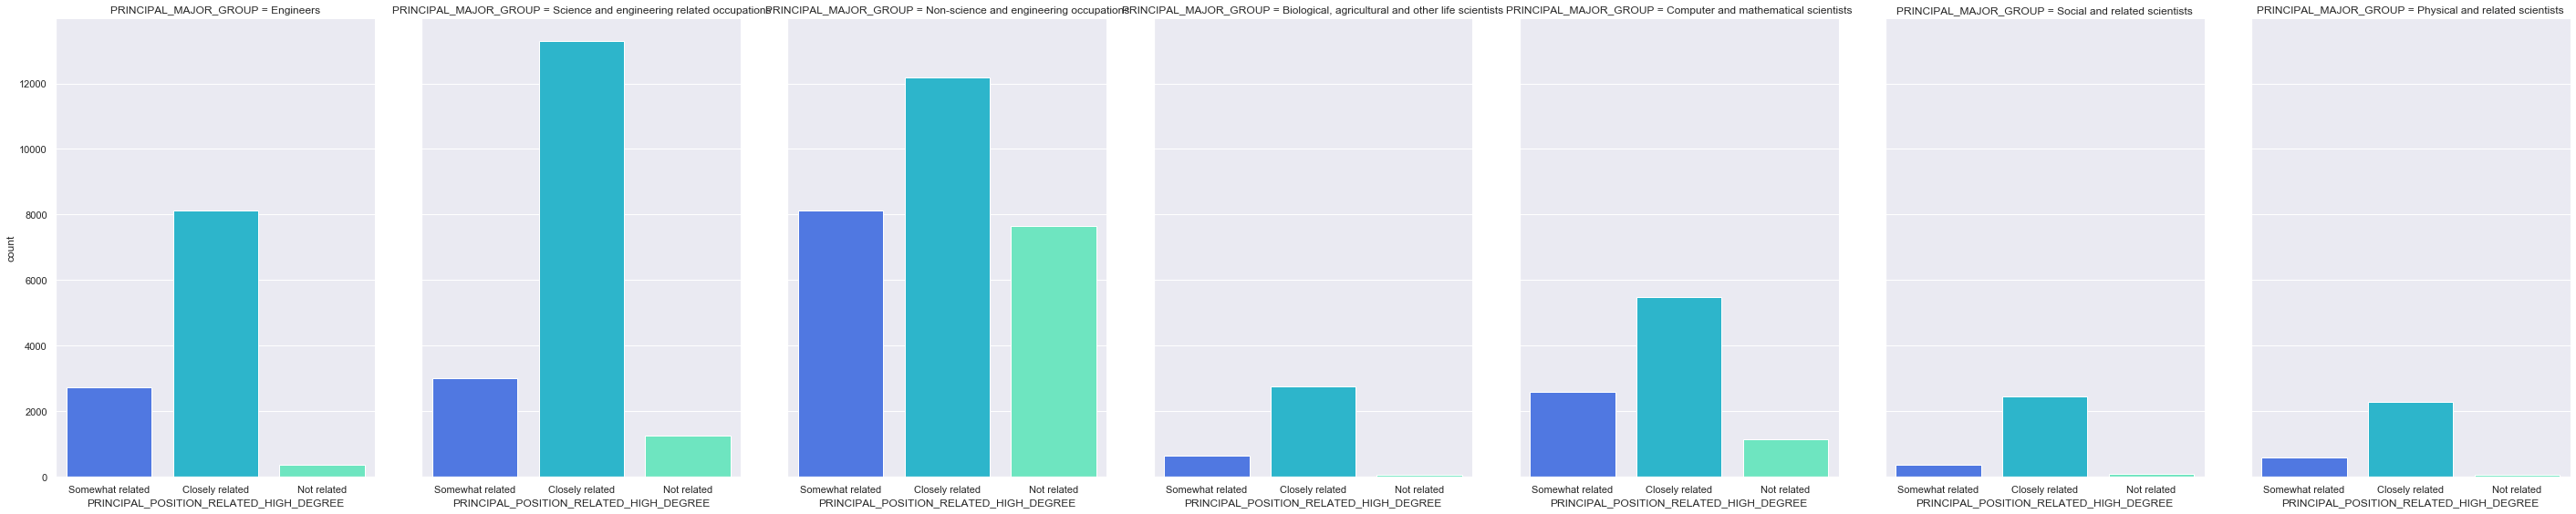

In [96]:
majorjob = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="PRINCIPAL_MAJOR_GROUP",
               data=working, kind="count",
               height=8, aspect=.7)

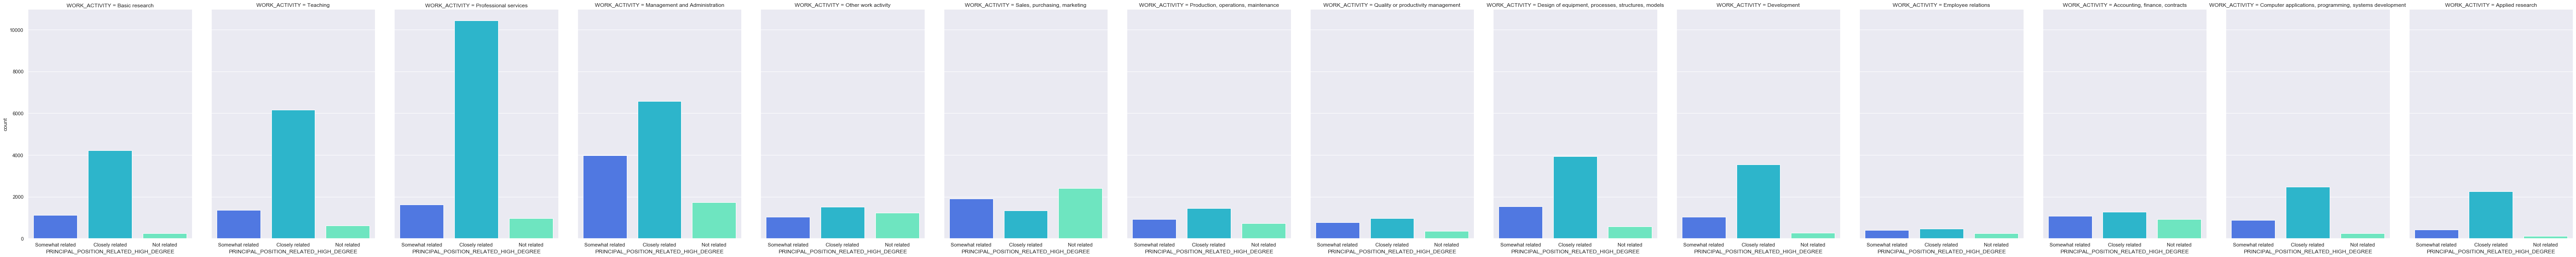

In [97]:
workact = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="WORK_ACTIVITY",
               data=working, kind="count",
               height=8, aspect=.7)

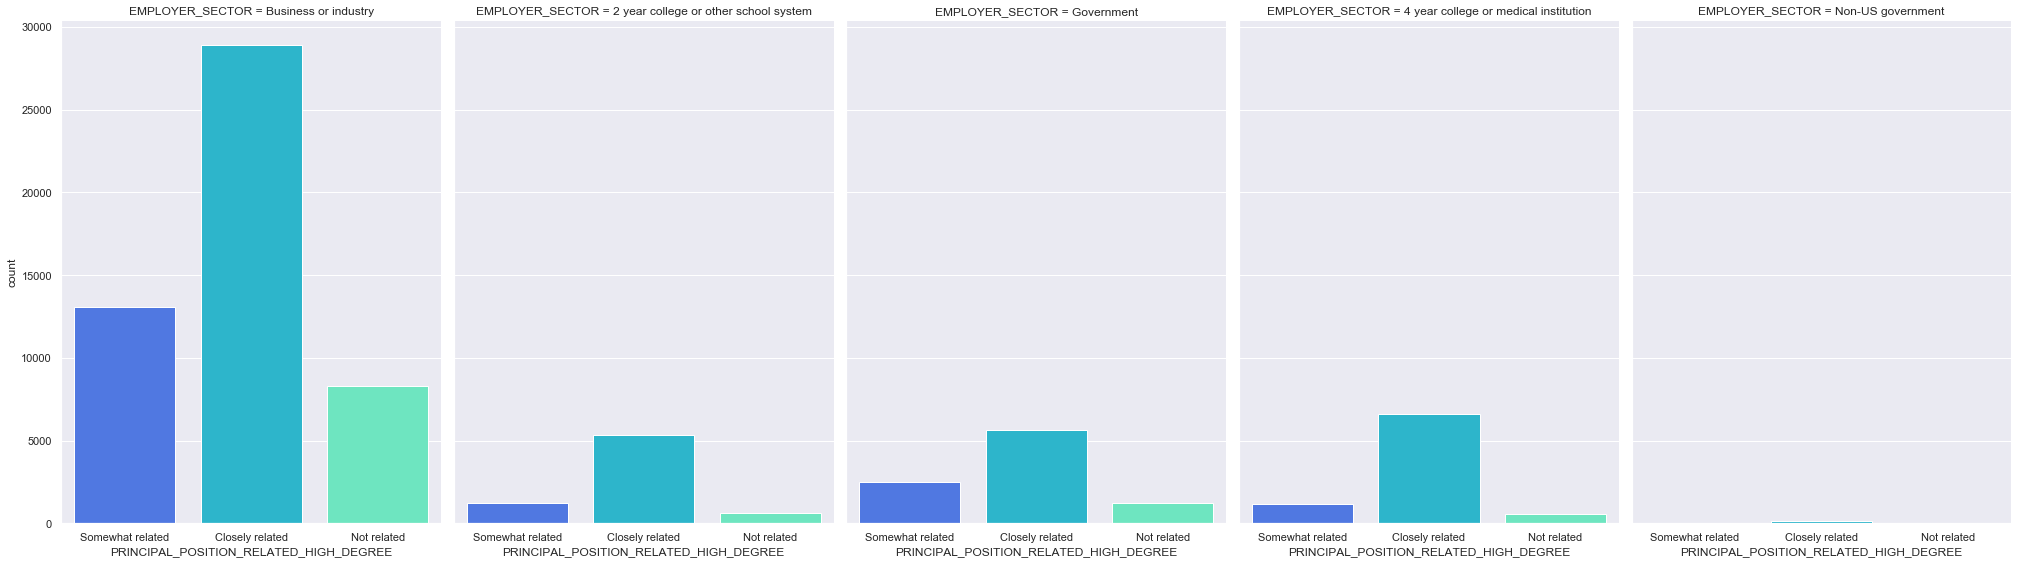

In [98]:
empsect = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="EMPLOYER_SECTOR",
               data=working, kind="count",
               height=8, aspect=.7)

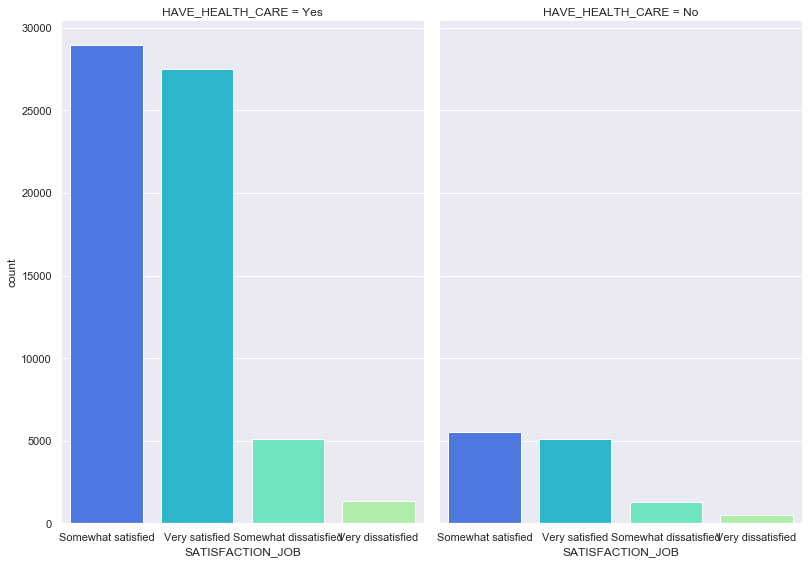

In [99]:
healthjob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_HEALTH_CARE",
               data=working, kind="count",
               height=8, aspect=.7)

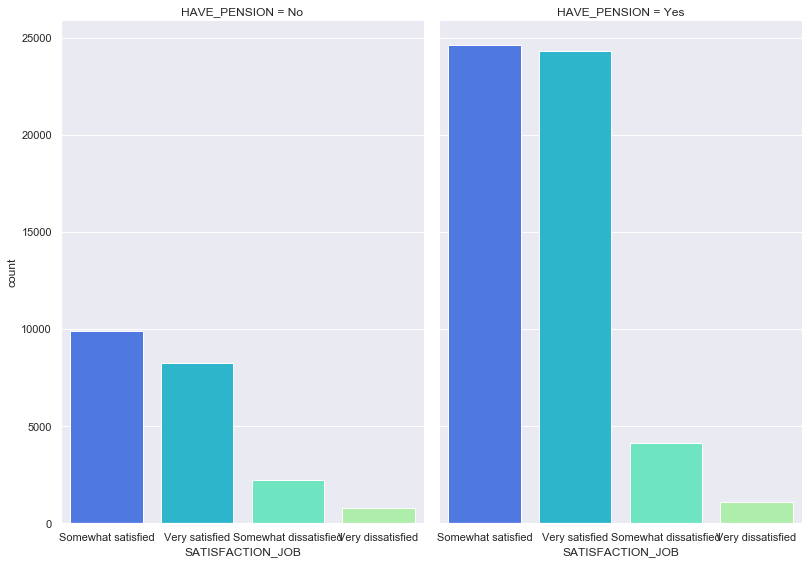

In [100]:
penjob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_PENSION",
               data=working, kind="count",
               height=8, aspect=.7)

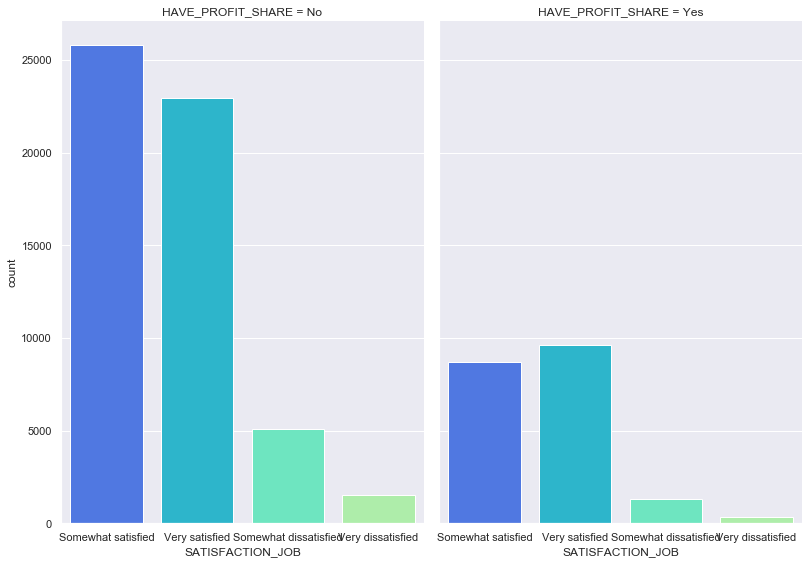

In [101]:
sharejob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_PROFIT_SHARE",
               data=working, kind="count",
               height=8, aspect=.7)

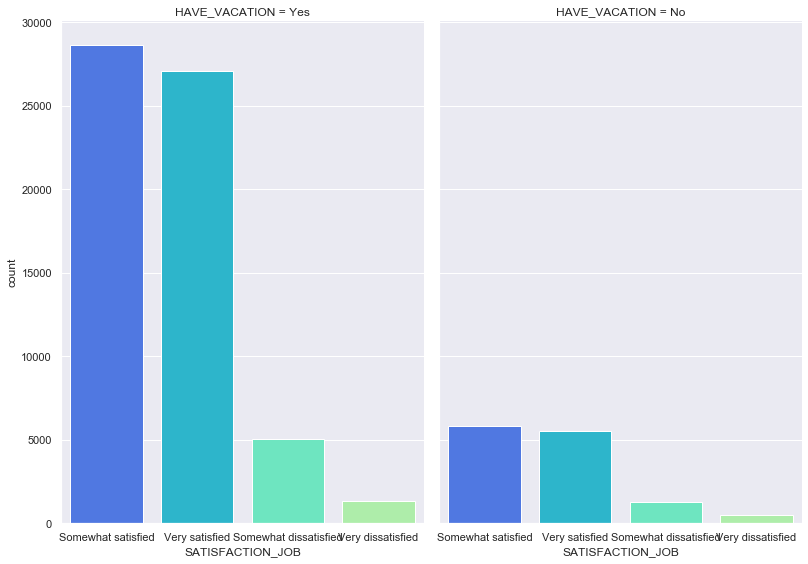

In [102]:
vacjob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_VACATION",
               data=working, kind="count",
               height=8, aspect=.7)

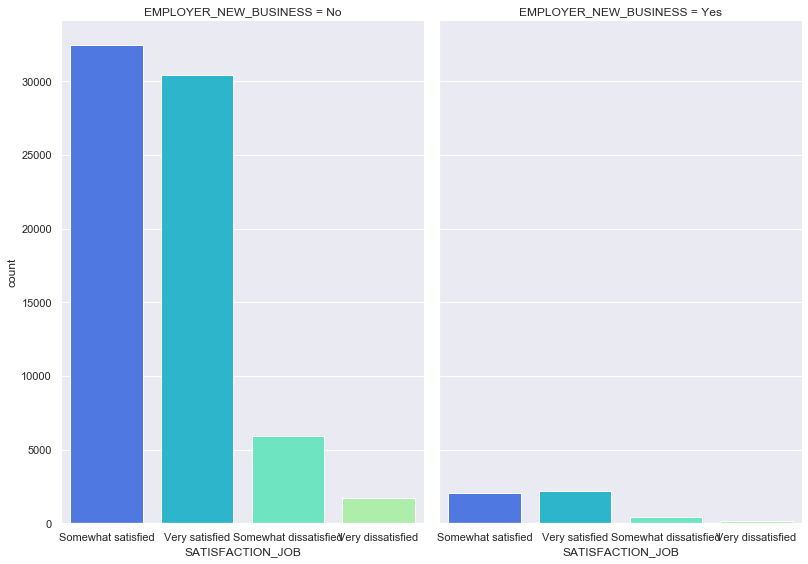

In [103]:
newbus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_NEW_BUSINESS",
               data=working, kind="count",
               height=8, aspect=.7)

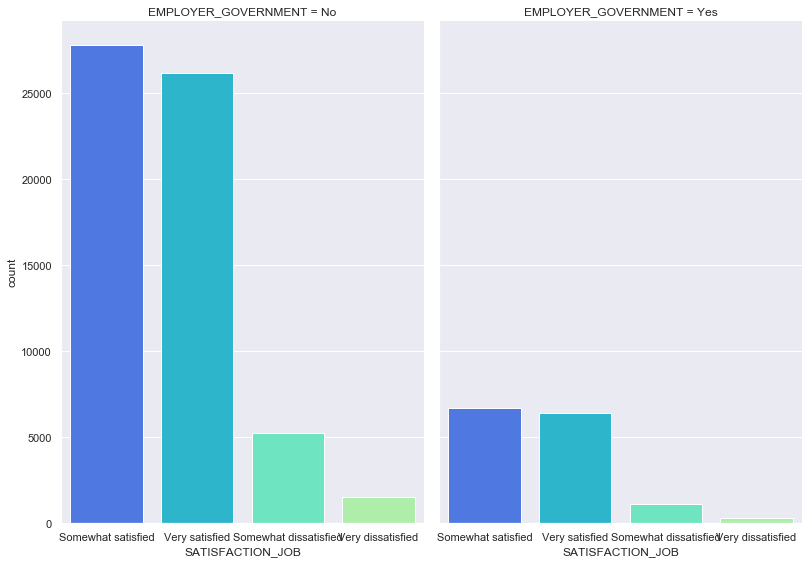

In [104]:
govbus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_GOVERNMENT",
               data=working, kind="count",
               height=8, aspect=.7)

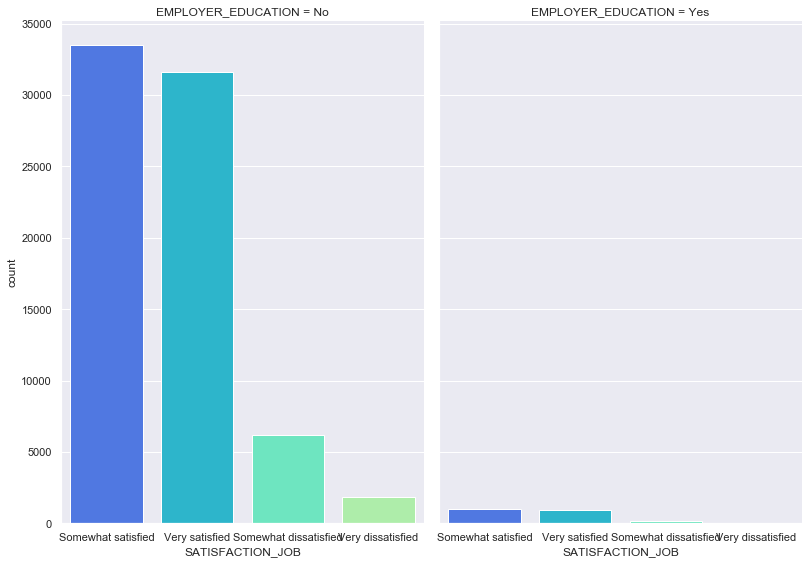

In [105]:
edubus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_EDUCATION",
               data=working, kind="count",
               height=8, aspect=.7)

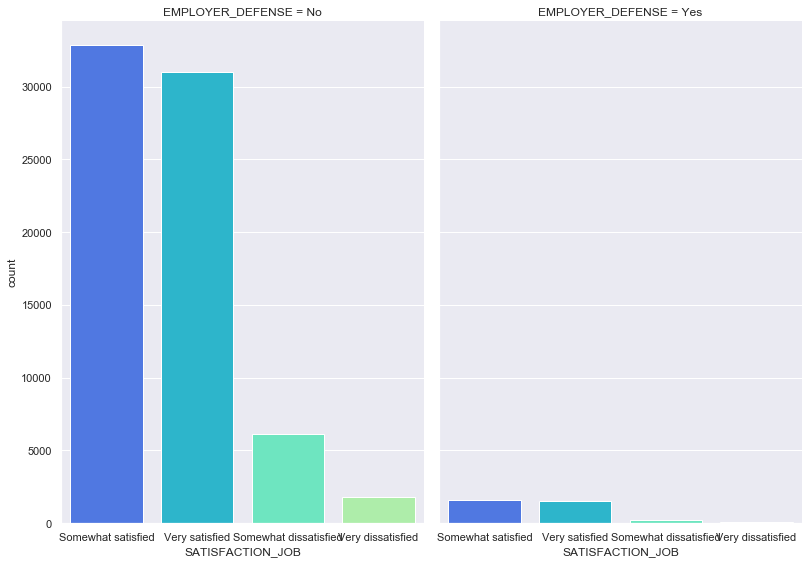

In [106]:
denbus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_DEFENSE",
               data=working, kind="count",
               height=8, aspect=.7)

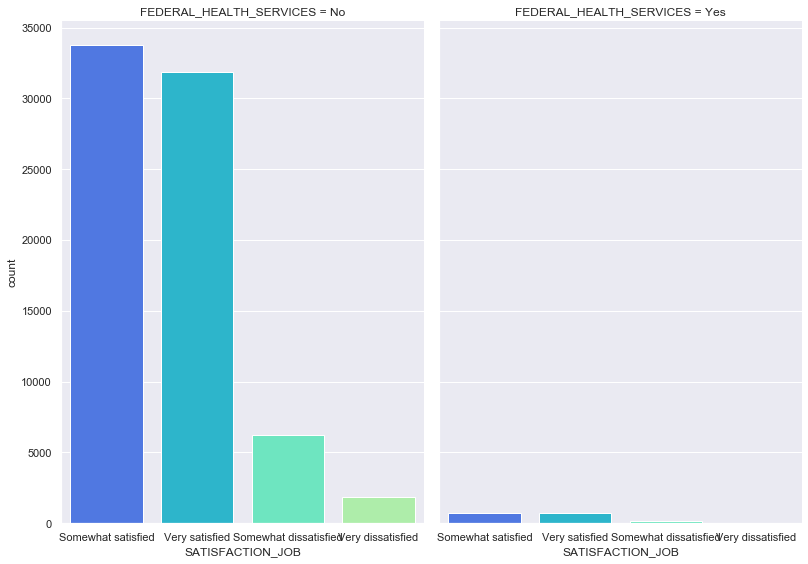

In [107]:
hbus = sns.catplot(x="SATISFACTION_JOB", col="FEDERAL_HEALTH_SERVICES",
               data=working, kind="count",
               height=8, aspect=.7)

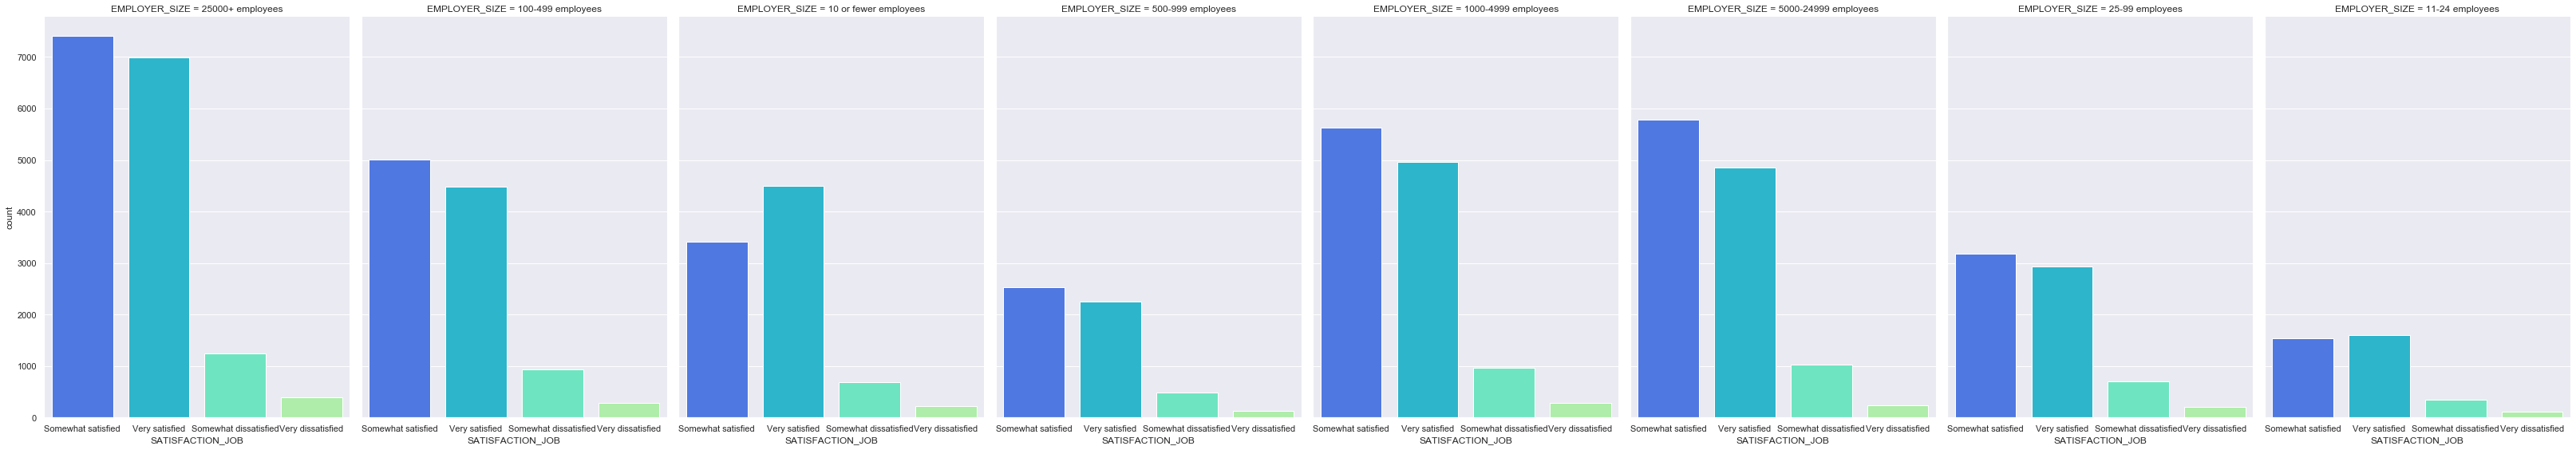

In [108]:
sizejob = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_SIZE",
               data=working, kind="count",
               height=8, aspect=.7)

In [109]:
workingnew = working[['REFID', 'HOURS_WORKED',' SALARY ','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',  'WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON', 'WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE', 'WORK_OUTSIDE_DEGREE_FOR_WORK_COND', 'WORK_OUTSIDE_DEGREE_FOR_FAMILY', 'WORK_OUTSIDE_DEGREE_FOR_LOC', 'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL', 'WORK_OUTSIDE_DEGREE_FOR_OTHER', 'WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE', 'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'ATTEND_TRAINING_WORK_RELATE', 'ATTEND_TRAINING', 'ATTEND_TRAINING_CHANGE_FIELD', 'ATTEND_TRAINING_BY_EMPLOYER',
       'ATTEND_TRAINING_CERT', 'ATTEND_TRAINING_INCREASE_ADV_CUR', 'ATTEND_TRAINING_OTHER', 'ATTEND_TRAINING_PERSONAL', 'ATTEND_TRAINING_ACQUIRE_SKILL', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES']]

# MAIN DATAFRAME 

In [110]:
workedu = pd.merge(left=workingnew, right=edudbnew, left_on='REFID', right_on='REFID')

In [111]:
workedu

,REFID,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
0,500452963,Greater than 40 hours,"$94,000.00",Yes,Yes,No,Yes,Not related,Computer scientists and mathematicians,Computer and mathematical scientists,2 year college or other school system,1000-4999 employees,Professional services,Other,Teaching,Teaching,No,No,No,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No memberships,No,Working conditions,Job location,Yes,Yes,Yes,Yes,Yes,No,No,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,No,Other,No,No,No,No,No,No,No,No,No,No,Bachelor,NaN,Physical and related sciences,No,No,No,No,No,No,No,No
1,500452978,36 - 40 hours,"$120,000.00",Yes,Yes,No,Yes,Closely related,Other Non-science and engineering occupations,Non-science and engineering occupations,Government,25000+ employees,Professional services,Other,Management and Administration,Management and Administration,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,1 membership,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,No,Other,No,No,No,No,No,No,No,No,No,Yes,Doctorate,Other non-science and engineering,Non-science and engineering fields,No,No,No,No,No,No,No,No
2,500453007,Greater than 40 hours,"$146,000.00",Yes,Yes,No,Yes,Closely related,science and engineering managers,Science and engineering related occupations,Government,1000-4999 employees,Management and Administration,Management and Administration,Employee relations,Management and Administration,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No memberships,Yes,No,No,No,No,No,No,No,No,No,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Yes,To facilitate a change in occupation field,No,No,Yes,No,No,No,Yes,Yes,No,No,Master,Management and administration,Non-science and e

In [112]:
alldata = pd.merge(left=perdata, right=workedu, left_on='REFID', right_on='REFID')

In [113]:
alldata.sample(5)

,REFID,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
5585,B10110689,31,Male,No,White,United States,Yes,Born in US or US territories,None,Greater than 40 hours,"$110,000.00",Yes,Yes,Yes,Yes,Closely related,Electrical or computer hardware engineers,Engineers,Business or industry,25000+ employees,"Computer applications, programming, systems de...",Research and Development,"Design of equipment, processes, structures, mo...",Computer Applications,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No memberships,No,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Yes,To facilitate a change in occupation field,No,No,No,No,No,No,Yes,Yes,No,No,Master,"Electrical, electronics and communications eng...",Engineering,No,No,No,No,No,No,No,No
33299,E11361516,49,Female,Yes,Under-represented minorities,Not in the US,Yes,By naturalization,None,36 - 40 hours,"$24,000.00",No,No,No,Yes,Not related,Other Non-science and engineering occupations,Non-science and engineering occupations,Business or industry,25000+ employees,"Sales, purchasing, marketing",Management and Administration,Teaching,Teaching,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No memberships,No,Other reason for not working,Working conditions,No,Yes,Yes,No,Yes,Yes,No,Very dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Very dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Very dissatisfied,Very dissatisfied,Somewhat dissatisfied,No,Other,No,No,No,No,No,No,No,No,No,No,Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",No,No,No,No,No,No,No,No
5156,B10073072,27,Male,Yes,Under-represented minorities,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$62,000.00",Yes,Yes,No,Yes,Closely related,Other engineers,Engineers,Business or industry,1000-4999 empl

In [114]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62373 entries, 0 to 62372
Data columns (total 90 columns):
REFID                                      62373 non-null object
AGE                                        62373 non-null int64
GENDER                                     62373 non-null object
MINORITY                                   62373 non-null object
RACE                                       62373 non-null object
BIRTH_PLACE                                62373 non-null object
US_CITIZENSHIP                             62373 non-null object
US_CITIZEN_TYPE                            62373 non-null object
TOTAL_CHILDREN                             62373 non-null object
HOURS_WORKED                               62373 non-null object
 SALARY                                    62373 non-null object
HAVE_HEALTH_CARE                           62373 non-null object
HAVE_PENSION                               62373 non-null object
HAVE_PROFIT_SHARE                          6237

In [115]:
alldata.shape

(62373, 90)

In [116]:
alldata.columns

Index(['REFID', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRS

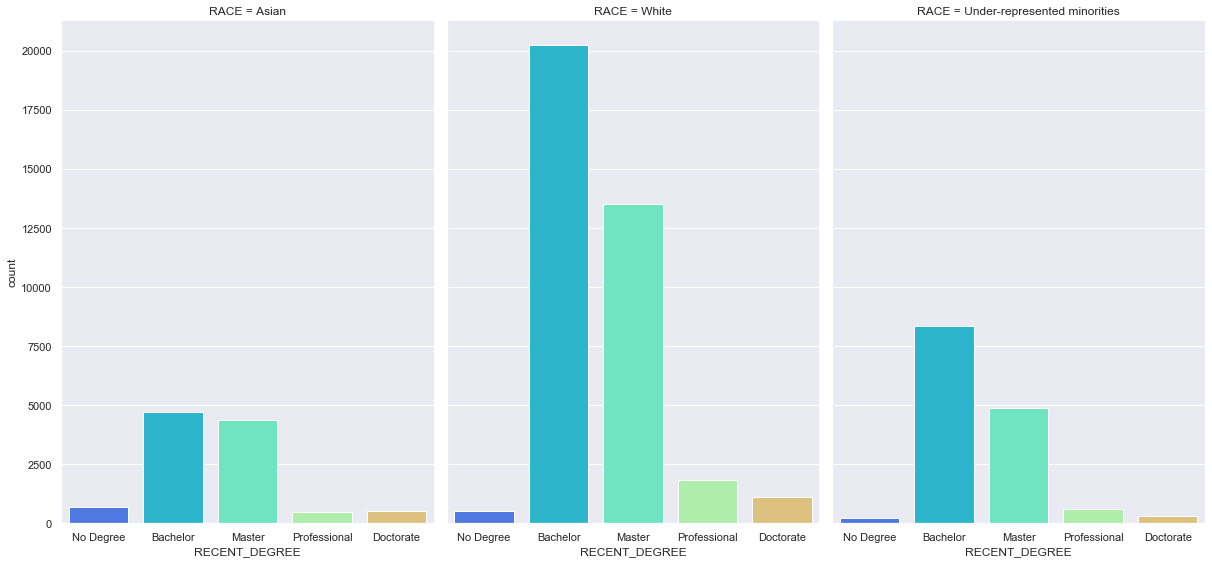

In [117]:
raceedu = sns.catplot(x="RECENT_DEGREE", col="RACE",
               data=alldata, kind="count",
               height=8, aspect=.7)

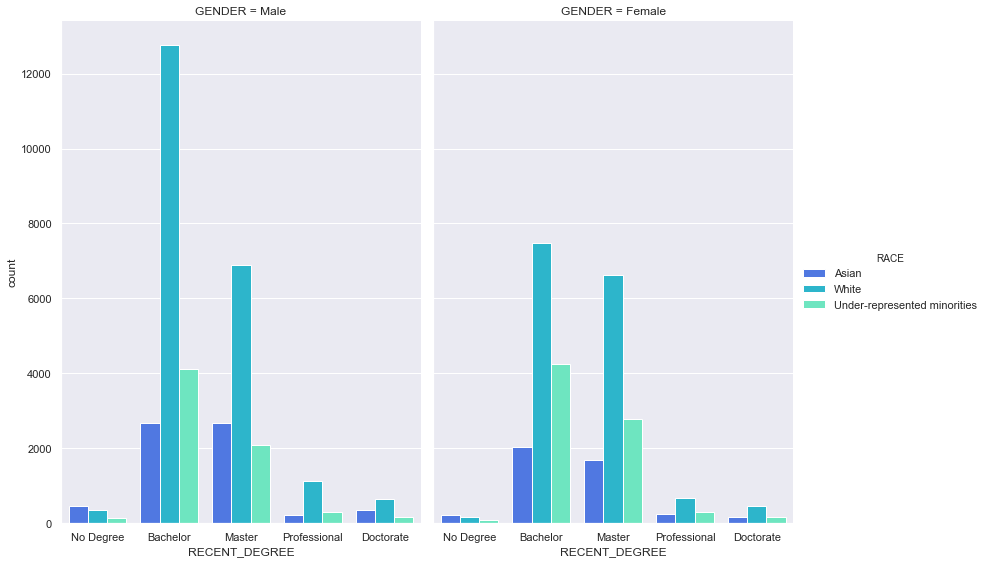

In [118]:
degreegen = sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "RACE",
               data=alldata, kind="count",
               height=8, aspect=.7)

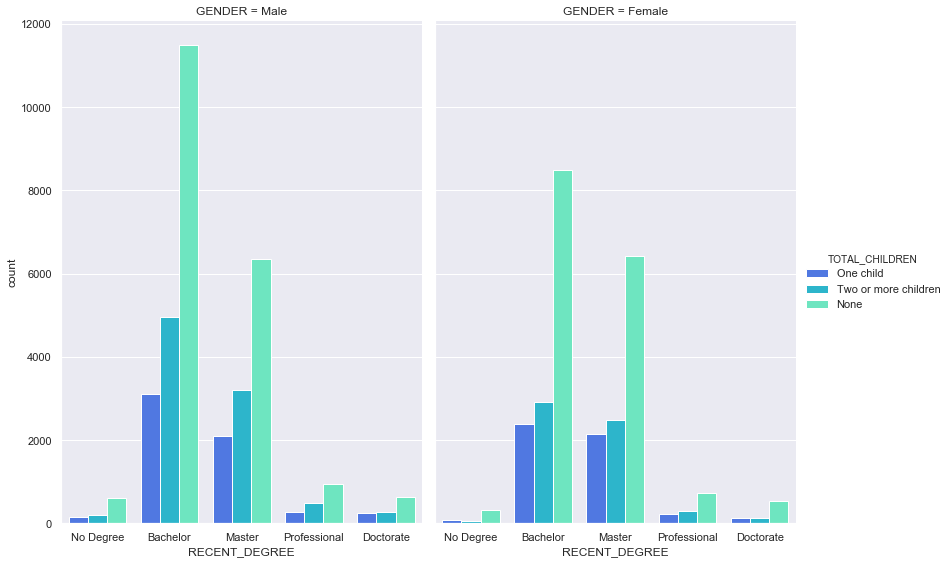

In [119]:
degreekids = sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=.7)

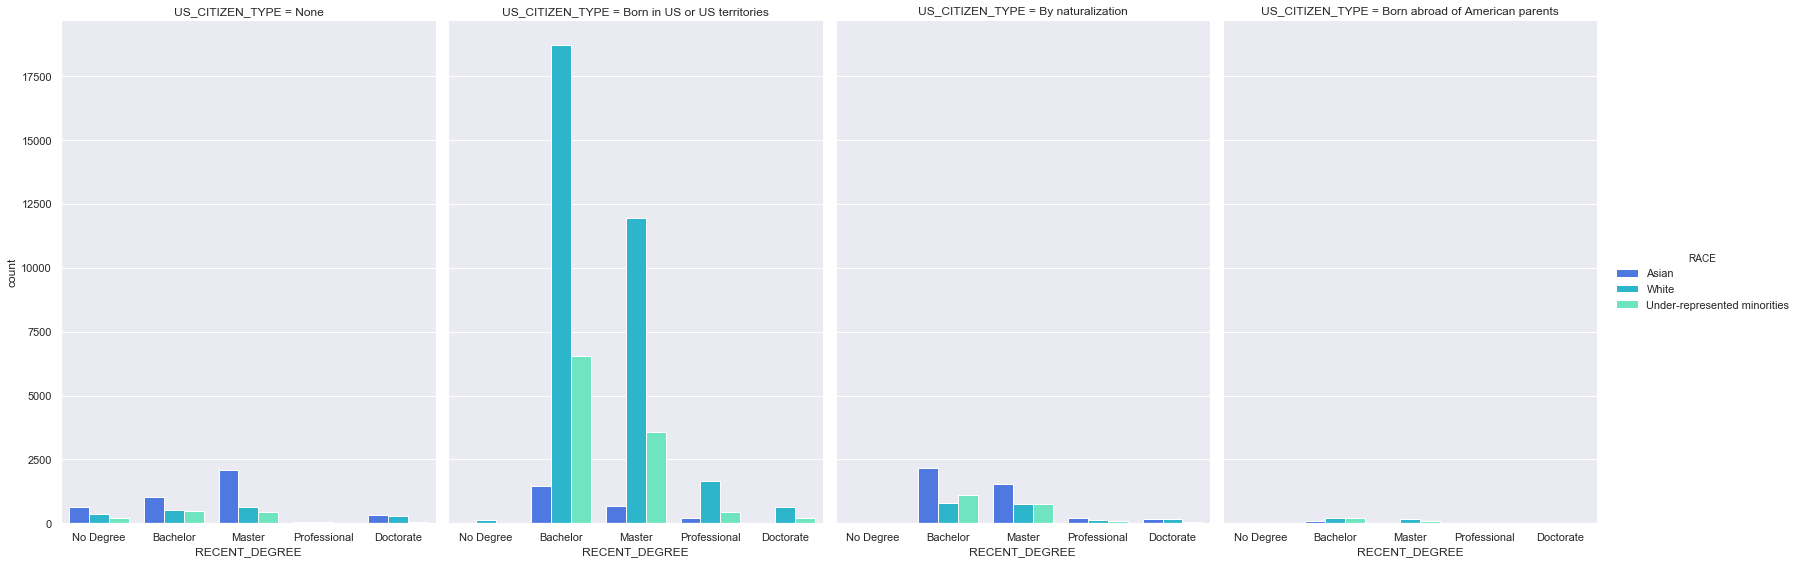

In [120]:
typeedu = sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "RACE",
               data=alldata, kind="count",
               height=8, aspect=.7)

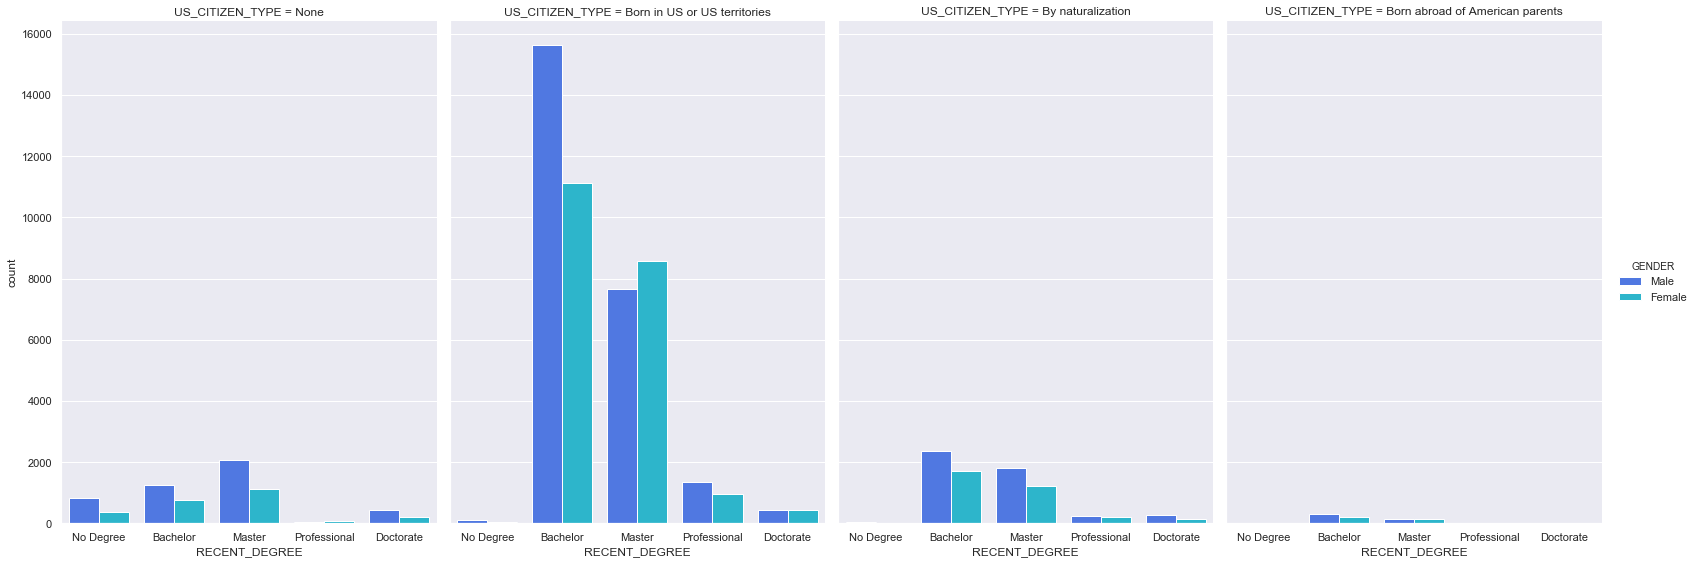

In [121]:
genderedu = sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "GENDER",
               data=alldata, kind="count",
               height=8, aspect=.7)

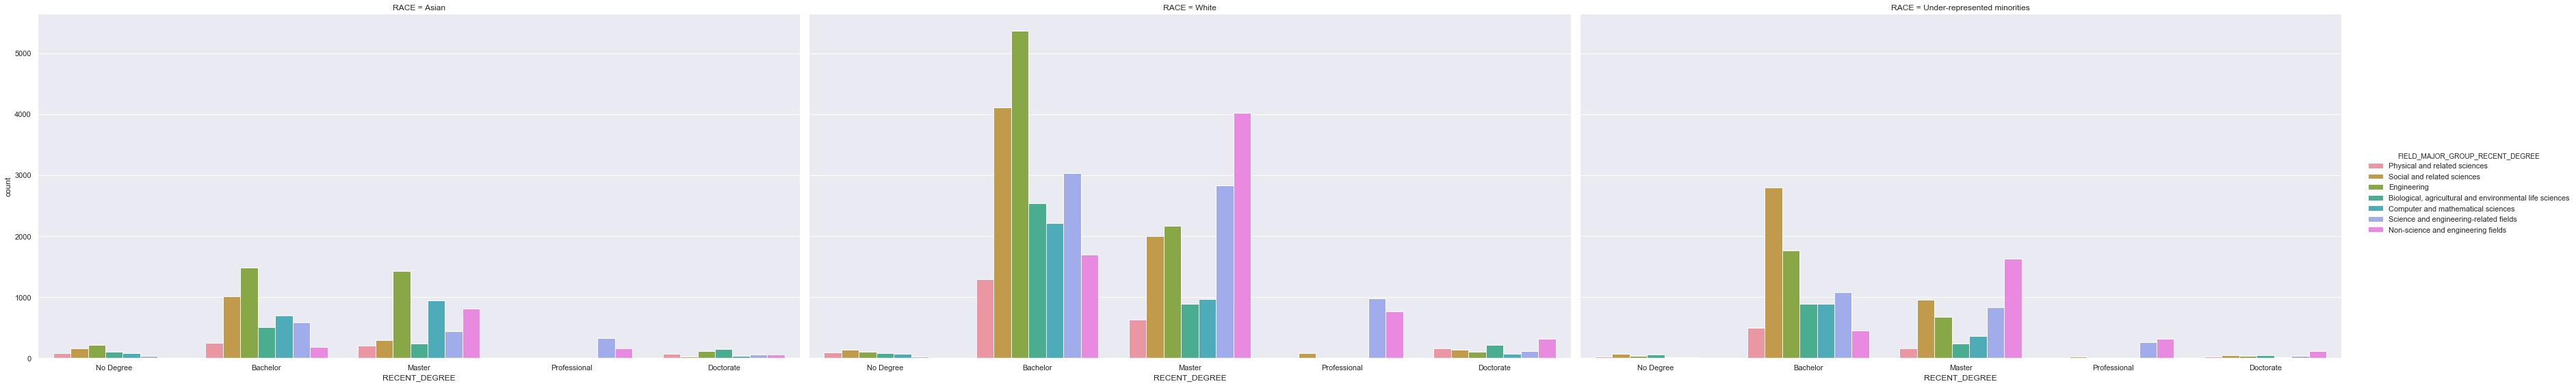

In [122]:
racedegreemajor = sns.catplot(x="RECENT_DEGREE", col = "RACE", hue = "FIELD_MAJOR_GROUP_RECENT_DEGREE",
               data=alldata, kind="count",
               height=8, aspect=2)

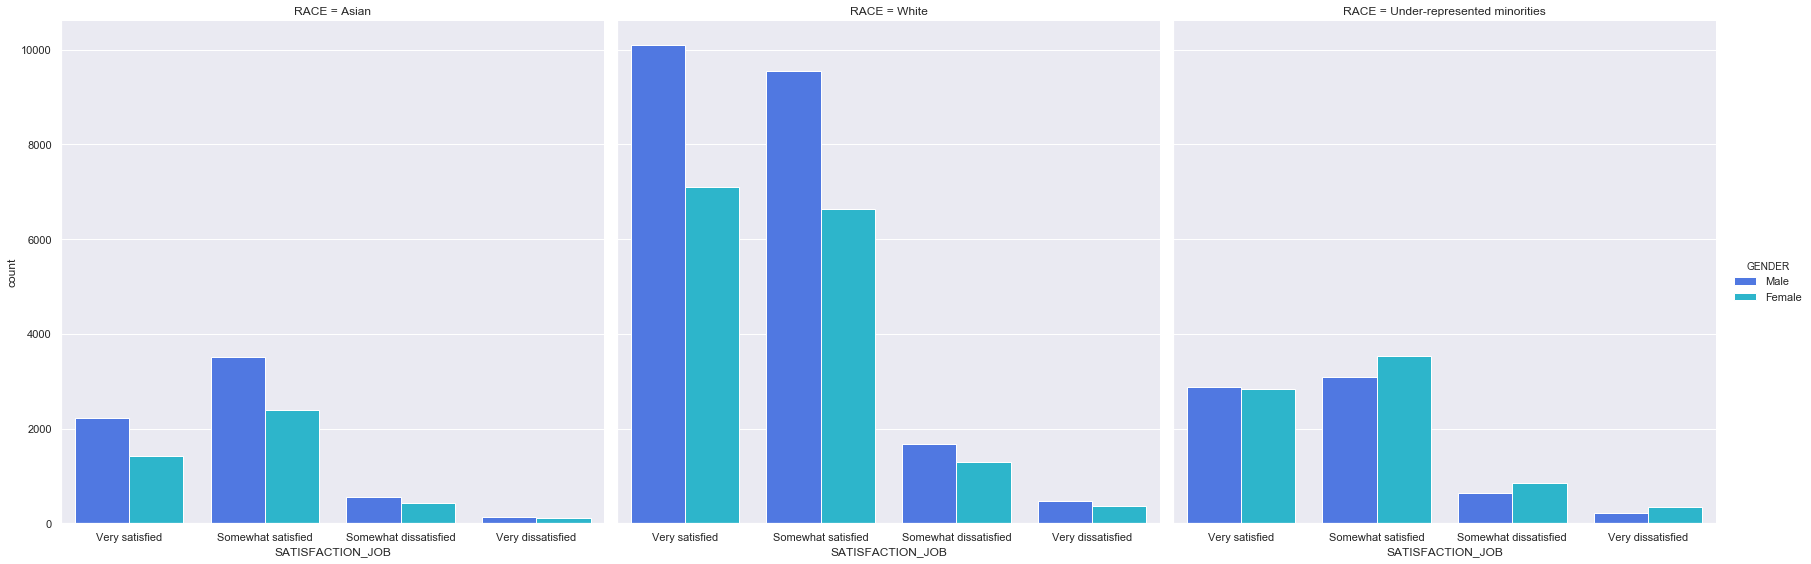

In [123]:
jobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "RACE", hue = "GENDER",
               data=alldata, kind="count",
               height=8, aspect=1)

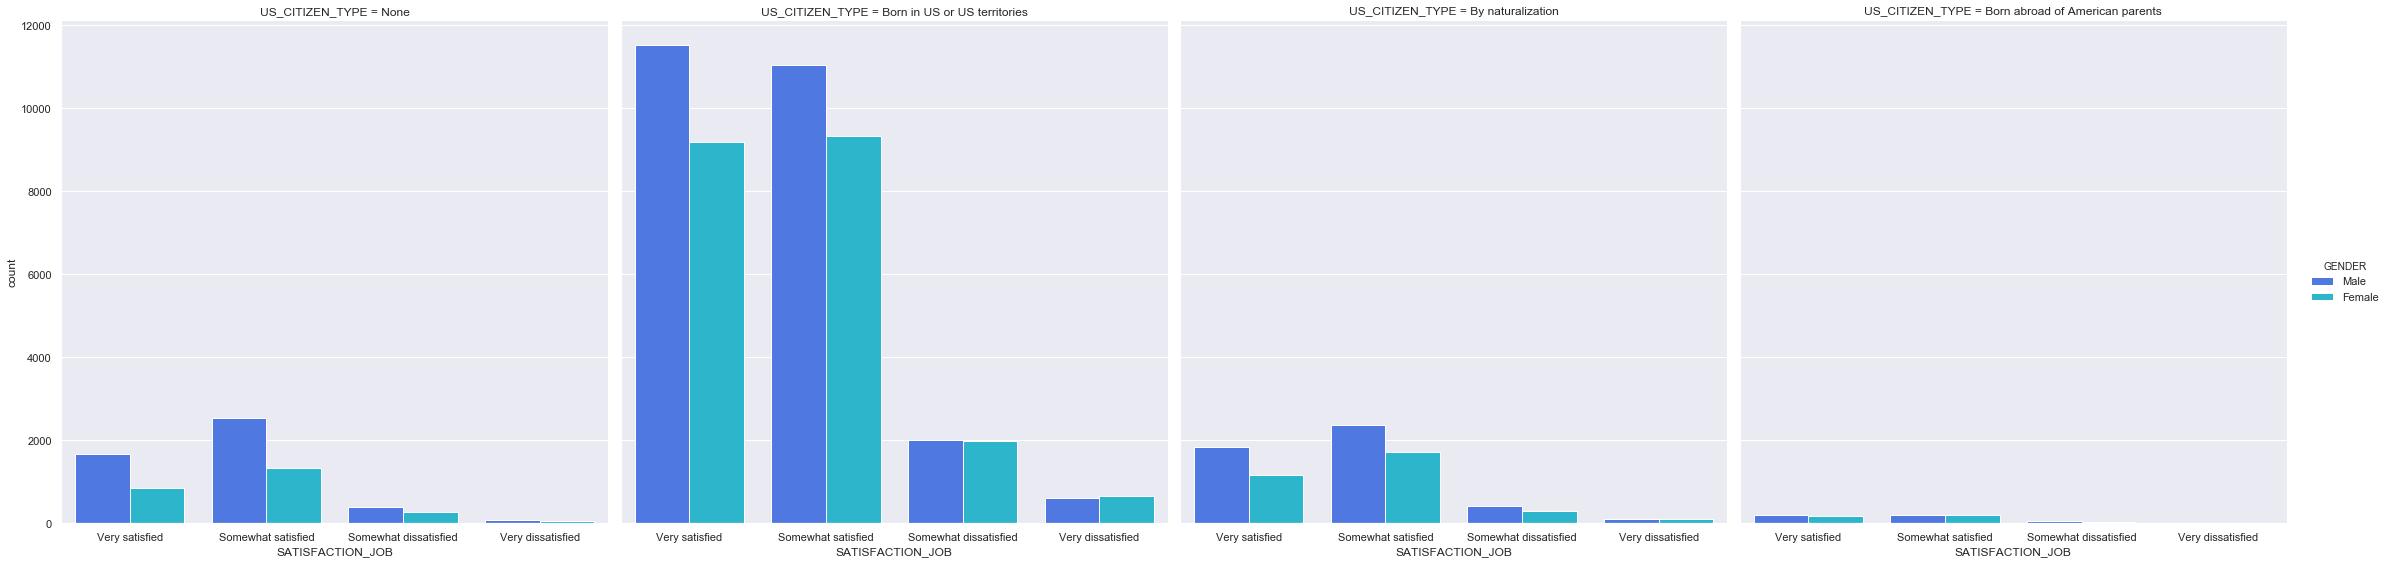

In [124]:
typejobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "US_CITIZEN_TYPE", hue = "GENDER",
               data=alldata, kind="count",
               height=8, aspect=1)

In [125]:
alldata.columns

Index(['REFID', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRS

In [126]:
heart = alldata[['REFID','HOURS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP','WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK','WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON',  'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES', 'RECENT_DEGREE',
       'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE']]

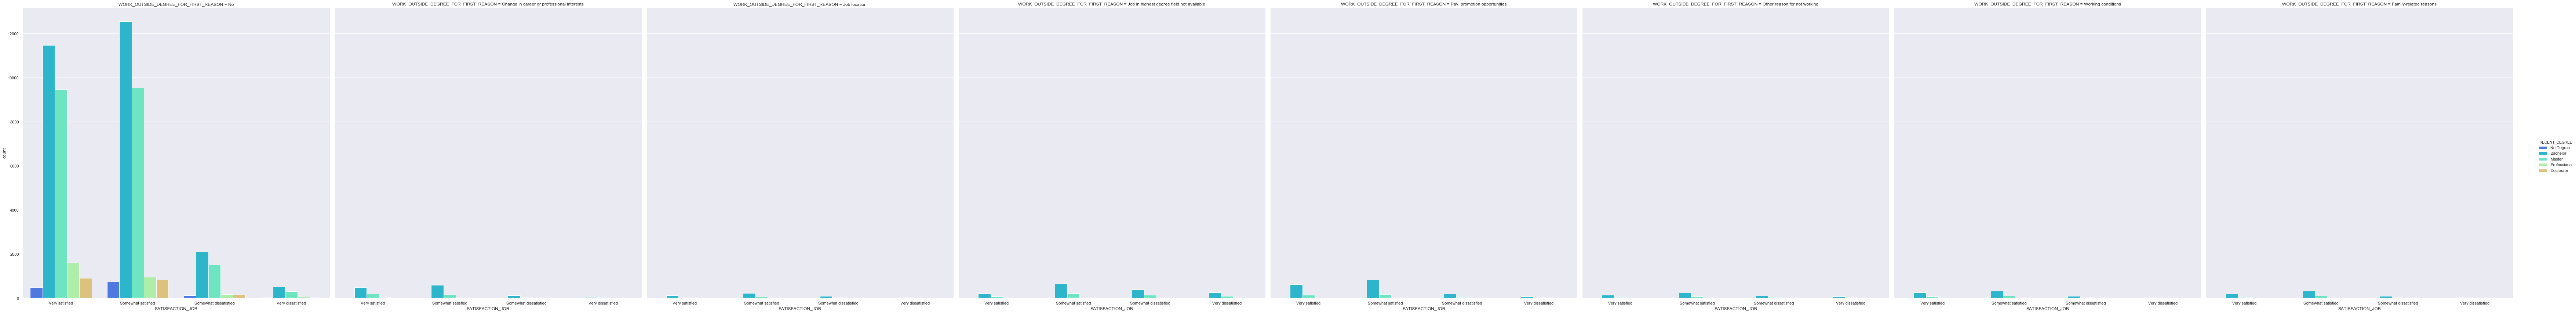

In [127]:
workoutstat = sns.catplot(x="SATISFACTION_JOB",  col= "WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON", hue = "RECENT_DEGREE",
               data=alldata, kind="count",
               height=12, aspect=1)

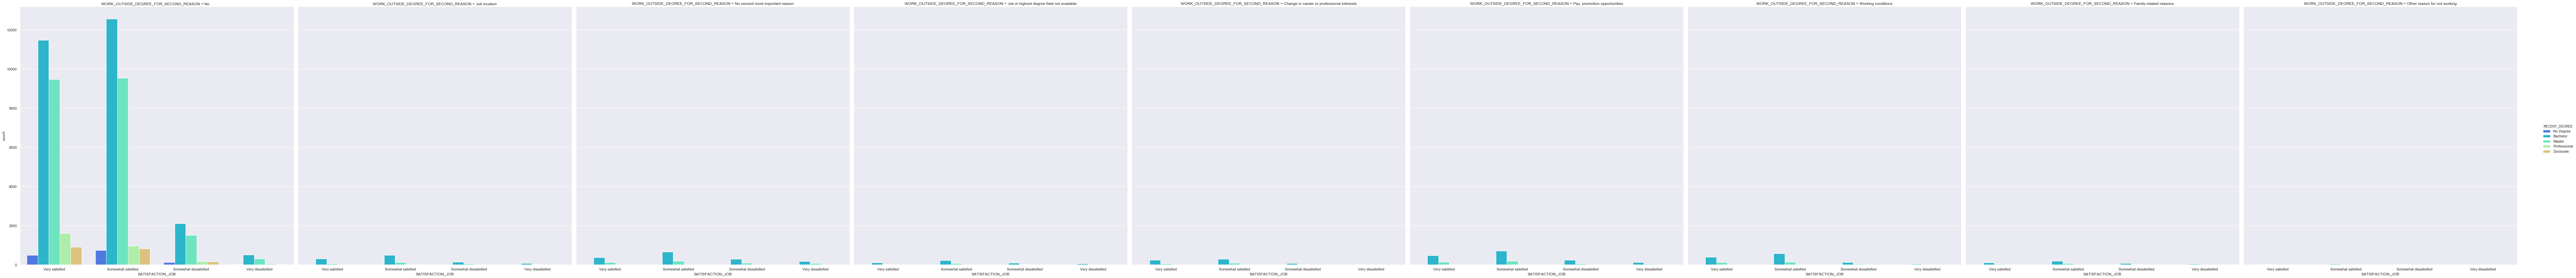

In [128]:
workoutstat2 = sns.catplot(x="SATISFACTION_JOB",  col= "WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON", hue = "RECENT_DEGREE",
               data=alldata, kind="count",
               height=12, aspect=1)

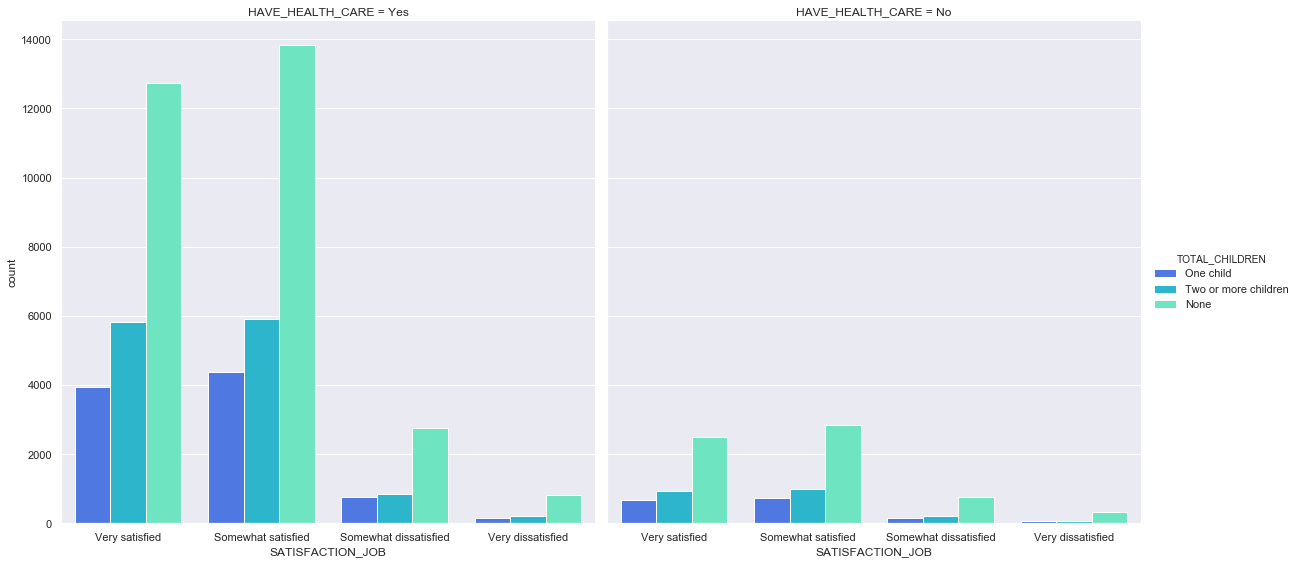

In [129]:
penjobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "HAVE_HEALTH_CARE", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=1)

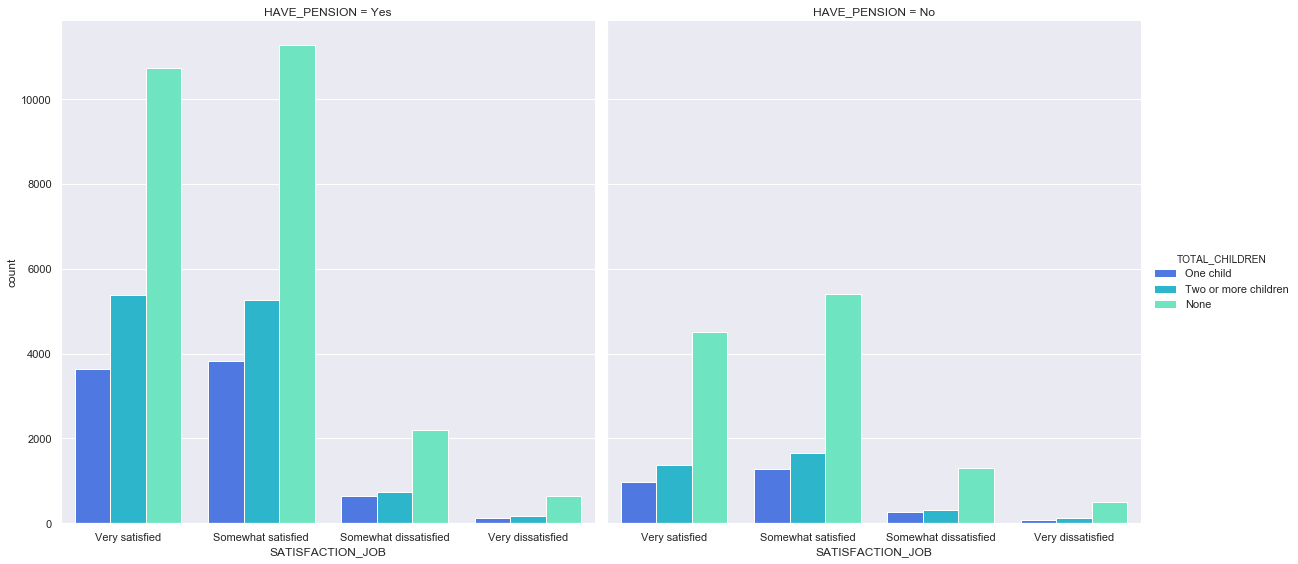

In [130]:
typejobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "HAVE_PENSION", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=1)

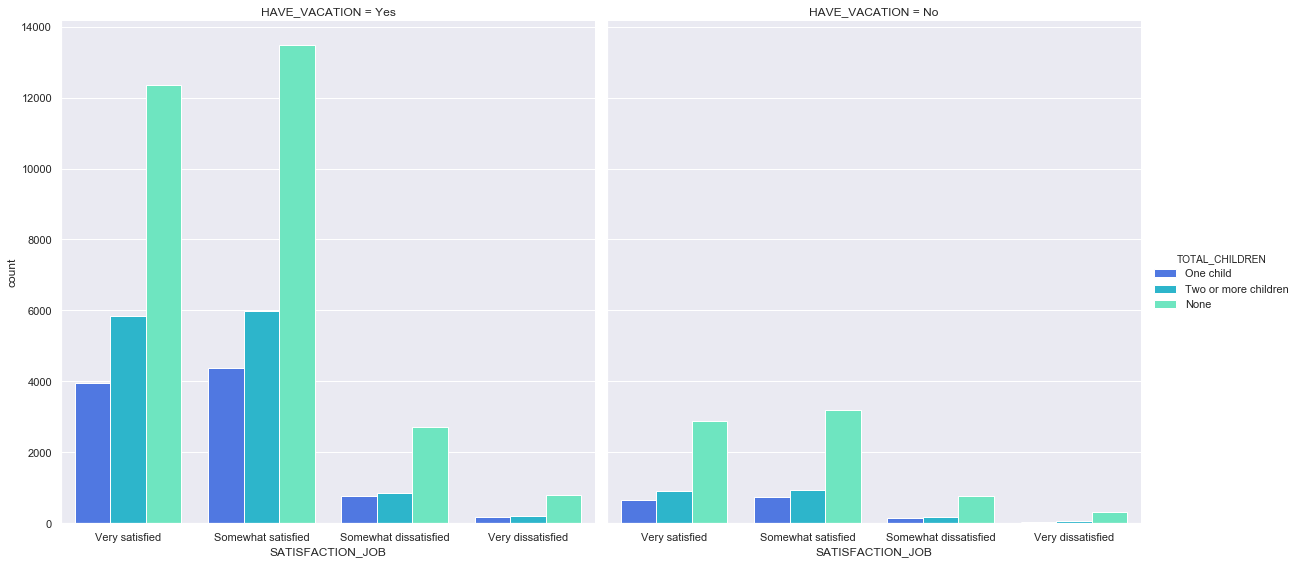

In [131]:
vacjobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "HAVE_VACATION", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=1)

In [132]:
heart.head(2)

,REFID,HOURS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE
0,20901QY86,36 - 40 hours,Yes,Yes,No,Yes,Physicists and astronomers,Physical and related scientists,Applied research,Research and Development,Management and Administration,Management and Administration,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,No,Yes,No,No,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Yes,No,No,No Degree,Physics and astronomy,Physical and related sciences
1,20902AN23,Greater than 40 hours,Yes,Yes,No,Yes,Physicists and astronomers,Physical and related scientists,Management and Administration,Management and Administration,"Computer applications, programming, systems de...",Research and Development,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Yes,No,Yes,No Degree,NaN,Physical and related sciences


In [133]:
satisdf = heart[['HAVE_VACATION','HAVE_PROFIT_SHARE','HAVE_PENSION','HAVE_HEALTH_CARE','SATISFACTION_JOB']]

In [134]:
satisdf.head()

,HAVE_VACATION,HAVE_PROFIT_SHARE,HAVE_PENSION,HAVE_HEALTH_CARE,SATISFACTION_JOB
0,Yes,No,Yes,Yes,Very satisfied
1,Yes,No,Yes,Yes,Very satisfied
2,Yes,No,Yes,Yes,Somewhat satisfied
3,Yes,No,Yes,Yes,Somewhat satisfied
4,Yes,No,No,No,Very satisfied


In [135]:
satisdf.shape

(62373, 5)

In [136]:
satisdf_origin = pd.get_dummies(satisdf)

In [137]:
satisdf_origin.sample(3)

,HAVE_VACATION_No,HAVE_VACATION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,SATISFACTION_JOB_Somewhat dissatisfied,SATISFACTION_JOB_Somewhat satisfied,SATISFACTION_JOB_Very dissatisfied,SATISFACTION_JOB_Very satisfied
58669,0,1,0,1,0,1,0,1,0,0,0,1
36747,0,1,1,0,0,1,0,1,0,1,0,0
16553,0,1,0,1,0,1,0,1,0,0,0,1


In [138]:
satisdf_origin = satisdf_origin.drop('SATISFACTION_JOB_Somewhat satisfied', axis =1)
satisdf_origin = satisdf_origin.drop('SATISFACTION_JOB_Somewhat dissatisfied', axis =1)
satisdf_origin = satisdf_origin.drop('SATISFACTION_JOB_Very dissatisfied', axis =1)
satisdf_origin = satisdf_origin.drop('SATISFACTION_JOB_Very satisfied', axis =1)

In [139]:
satisdf_origin.head()

,HAVE_VACATION_No,HAVE_VACATION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes
0,0,1,1,0,0,1,0,1
1,0,1,1,0,0,1,0,1
2,0,1,1,0,0,1,0,1
3,0,1,1,0,0,1,0,1
4,0,1,1,0,1,0,1,0


In [140]:
satisdf_origin.sample(3)

,HAVE_VACATION_No,HAVE_VACATION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes
50727,0,1,1,0,0,1,1,0
29788,0,1,0,1,0,1,0,1
21870,0,1,1,0,0,1,0,1


In [141]:
## import dependencies
#from sklearn import tree 
#clf = tree.DecisionTreeClassifier()
#clf_train = clf.fit(satisdf_origin, satisdf['SATISFACTION_JOB'])

In [142]:
#print(tree.export_graphviz(clf_train,  None))

In [143]:
#from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#from sklearn.model_selection import train_test_split # Import train_test_split function
#from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [144]:
#X = satisdf_origin

In [145]:
#y =  heart.SATISFACTION_JOB

In [146]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=2) # 70% training and 30% test

In [147]:
#clf = DecisionTreeClassifier()

In [148]:
#clf = clf.fit(X_train,y_train)

In [149]:
#y_pred = clf.predict(X_test)

In [150]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [151]:
hotcode = alldata

In [152]:
hotcode.sample(3)

,REFID,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
31216,E11316791,32,Female,No,White,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$40,000.00",Yes,Yes,No,Yes,Not related,Other Non-science and engineering occupations,Non-science and engineering occupations,4 year college or medical institution,5000-24999 employees,Employee relations,Management and Administration,Management and Administration,Management and Administration,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,Yes,No memberships,No,Working conditions,Change in career or professional interests,Yes,Yes,No,Yes,No,No,No,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Very dissatisfied,Very dissatisfied,Very satisfied,Very dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Yes,To facilitate a change in occupation field,No,Yes,No,Yes,No,Yes,Yes,No,No,No,Bachelor,Health-related fields,Science and engineering-related fields,Yes,Yes,Yes,Yes,No,Yes,No,No
59918,500493377,49,Male,No,White,United States,Yes,Born in US or US territories,One child,Greater than 40 hours,"$90,000.00",Yes,Yes,No,Yes,Somewhat related,Computer scientists and mathematicians,Computer and mathematical scientists,Business or industry,25-99 employees,"Design of equipment, processes, structures, mo...",Computer Applications,Development,Research and Development,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,No,Yes,No,1 membership,Yes,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Yes,To facilitate a change in occupation field,No,No,No,Yes,No,No,Yes,Yes,No,No,Bachelor,Computer and mathematical science,Computer and mathematical sciences,No,No,No,No,No,No,No,No
19200,E11055076,30,Female,No,White,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$24,000.00",Yes,Yes,Yes,Yes,Not related,Other Non-science and engineering o

In [153]:
hotcode = hotcode.drop(['REFID', 'AGE','MINORITY',' SALARY ','TOTAL_CHILDREN','EMPLOYER_SECTOR','EMPLOYER_SIZE','SATISFACTION_JOB_ADVANCE','SATISFACTION_JOB_BENEFITS','SATISFACTION_JOB_CHALLENGE','SATISFACTION_JOB_INDEP','SATISFACTION_JOB_LOC','SATISFACTION_JOB_RESP','SATISFACTION_JOB_SALARY','SATISFACTION_JOB_SECURITY'], axis=1)

In [154]:
hotcode.sample(2)


,GENDER,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,HOURS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
37565,Female,White,United States,Yes,Born in US or US territories,Greater than 40 hours,Yes,Yes,No,Yes,Closely related,Non-science and engineering pre-college and po...,Non-science and engineering occupations,Teaching,Teaching,Professional services,Other,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,Yes,No,No,2 memberships,No,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Yes,To facilitate a change in occupation field,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Master,Other non-science and engineering,Non-science and engineering fields,No,No,No,No,No,No,No,No
52586,Female,White,United States,Yes,Born in US or US territories,Greater than 40 hours,Yes,Yes,No,Yes,Closely related,Other management related occupations,Non-science and engineering occupations,Quality or productivity management,Management and Administration,Management and Administration,Management and Administration,No,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No memberships,No,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Yes,To acquire further skills in my occupational f...,No,No,No,Yes,No,No,Yes,Yes,No,Yes,Master,Other non-science and engineering,Non-science and engineering fields,No,No,No,No,No,No,No,No


In [155]:
hotcode_origin = pd.get_dummies(hotcode)

In [156]:
hotcode_origin.sample(4)

,GENDER_Female,GENDER_Male,RACE_Asian,RACE_Under-represented minorities,RACE_White,BIRTH_PLACE_Not in the US,BIRTH_PLACE_United States,US_CITIZENSHIP_No,US_CITIZENSHIP_Yes,US_CITIZEN_TYPE_Born abroad of American parents,US_CITIZEN_TYPE_Born in US or US territories,US_CITIZEN_TYPE_By naturalization,US_CITIZEN_TYPE_None,HOURS_WORKED_20 or less,HOURS_WORKED_21 - 35 hours,HOURS_WORKED_36 - 40 hours,HOURS_WORKED_Greater than 40 hours,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,PRINCIPAL_POSITION_Biological and medical scientists,PRINCIPAL_POSITION_Chemical engineers,"PRINCIPAL_POSITION_Chemists, except biochemists",PRINCIPAL_POSITION_Civil engineers,PRINCIPAL_POSITION_Computer scientists and mathematicians,PRINCIPAL_POSITION_Economists,PRINCIPAL_POSITION_Electrical or computer hardware engineers,PRINCIPAL_POSITION_Health-related occupations,PRINCIPAL_POSITION_Mechanical engineers,PRINCIPAL_POSITION_Non-science and engineering pre-college and post-secondary teachers,PRINCIPAL_POSITION_Other Non-science and engineering occupations,PRINCIPAL_POSITION_Other engineers,PRINCIPAL_POSITION_Other life and related scientists,PRINCIPAL_POSITION_Other management related occupations,PRINCIPAL_POSITION_Other physical and related scientists,PRINCIPAL_POSITION_Other social scientists,PRINCIPAL_POSITION_Physicists and astronomers,PRINCIPAL_POSITION_Postsecondary teachers - engineering,PRINCIPAL_POSITION_Postsecondary teachers-Computer and math sciences,PRINCIPAL_POSITION_Postsecondary teachers-Life related sciences,PRINCIPAL_POSITION_Postsecondary teachers-Physical and related sciences,PRINCIPAL_POSITION_Postsecondary teachers-Social and related sciences,PRINCIPAL_POSITION_Psychologists,PRINCIPAL_POSITION_Science and engineering pre-college teachers,"PRINCIPAL_POSITION_Top and mid-level managers, executives, administrators",PRINCIPAL_POSITION_science and engineering managers,"PRINCIPAL_MAJOR_GROUP_Biological, agricultural and other life scientists",PRINCIPAL_MAJOR_GROUP_Computer and mathematical scientists,PRINCIPAL_MAJOR_GROUP_Engineers,PRINCIPAL_MAJOR_GROUP_Non-science and engineering occupations,PRINCIPAL_MAJOR_GROUP_Physical and related scientists,PRINCIPAL_MAJOR_GROUP_Science and engineering related occupations,PRINCIPAL_MAJOR_GROUP_Social and related scientists,"WORK_ACTIVITY_Accounting, finance, contracts",WORK_ACTIVITY_Applied research,WORK_ACTIVITY_Basic research,"WORK_ACTIVITY_Computer applications, programming, systems development","WORK_ACTIVITY_Design of equipment, processes, structures, models",WORK_ACTIVITY_Development,WORK_ACTIVITY_Employee relations,WORK_ACTIVITY_Management and Administration,WORK_ACTIVITY_Other work activity,"WORK_ACTIVITY_Production, operations, maintenance",WORK_ACTIVITY_Professional services,WORK_ACTIVITY_Quality or productivity management,"WORK_ACTIVITY_Sales, purchasing, marketing",WORK_ACTIVITY_Teaching,WORK_ACTIVITY_SUM_Computer Applications,WORK_ACTIVITY_SUM_Management and Administration,WORK_ACTIVITY_SUM_Other,WORK_ACTIVITY_SUM_Research and Development,WORK_ACTIVITY_SUM_Teaching,"WORK_ACTIVITY_SECOND_Accounting, finance, contracts",WORK_ACTIVITY_SECOND_Applied research,WORK_ACTIVITY_SECOND_Basic research,"WORK_ACTIVITY_SECOND_Computer applications, programming, systems development","WORK_ACTIVITY_SECOND_Design of equipment, processes, structures, models",WORK_ACTIVITY_SECOND_Development,WORK_ACTIVITY_SECOND_Employee relations,WORK_ACTIVITY_SECOND_Management and Administration,WORK_ACTIVITY_SECOND_No Secondary Activity,WORK_ACTIVITY_SECOND_Other work activity,"WORK_ACTIVITY_SECOND_Production, operations, maintenance",WORK_ACTIVITY_SECOND_Professional services,WORK_ACTIVITY_SECOND_Quality or productivity management,"WORK_ACTIVITY_SECOND_Sales

In [157]:
hotcode_origin = hotcode_origin.drop('SATISFACTION_JOB_Somewhat satisfied', axis =1)
hotcode_origin = hotcode_origin.drop('SATISFACTION_JOB_Somewhat dissatisfied', axis =1)
hotcode_origin = hotcode_origin.drop('SATISFACTION_JOB_Very dissatisfied', axis =1)

hotcode_origin = hotcode_origin.drop('SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied', axis =1)
hotcode_origin = hotcode_origin.drop('SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat dissatisfied', axis =1)
hotcode_origin = hotcode_origin.drop('SATISFACTION_JOB_CONTRIB_SOCIETY_Very dissatisfied', axis =1)



In [158]:
hotcode_origin.sample(3)

,GENDER_Female,GENDER_Male,RACE_Asian,RACE_Under-represented minorities,RACE_White,BIRTH_PLACE_Not in the US,BIRTH_PLACE_United States,US_CITIZENSHIP_No,US_CITIZENSHIP_Yes,US_CITIZEN_TYPE_Born abroad of American parents,US_CITIZEN_TYPE_Born in US or US territories,US_CITIZEN_TYPE_By naturalization,US_CITIZEN_TYPE_None,HOURS_WORKED_20 or less,HOURS_WORKED_21 - 35 hours,HOURS_WORKED_36 - 40 hours,HOURS_WORKED_Greater than 40 hours,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,PRINCIPAL_POSITION_Biological and medical scientists,PRINCIPAL_POSITION_Chemical engineers,"PRINCIPAL_POSITION_Chemists, except biochemists",PRINCIPAL_POSITION_Civil engineers,PRINCIPAL_POSITION_Computer scientists and mathematicians,PRINCIPAL_POSITION_Economists,PRINCIPAL_POSITION_Electrical or computer hardware engineers,PRINCIPAL_POSITION_Health-related occupations,PRINCIPAL_POSITION_Mechanical engineers,PRINCIPAL_POSITION_Non-science and engineering pre-college and post-secondary teachers,PRINCIPAL_POSITION_Other Non-science and engineering occupations,PRINCIPAL_POSITION_Other engineers,PRINCIPAL_POSITION_Other life and related scientists,PRINCIPAL_POSITION_Other management related occupations,PRINCIPAL_POSITION_Other physical and related scientists,PRINCIPAL_POSITION_Other social scientists,PRINCIPAL_POSITION_Physicists and astronomers,PRINCIPAL_POSITION_Postsecondary teachers - engineering,PRINCIPAL_POSITION_Postsecondary teachers-Computer and math sciences,PRINCIPAL_POSITION_Postsecondary teachers-Life related sciences,PRINCIPAL_POSITION_Postsecondary teachers-Physical and related sciences,PRINCIPAL_POSITION_Postsecondary teachers-Social and related sciences,PRINCIPAL_POSITION_Psychologists,PRINCIPAL_POSITION_Science and engineering pre-college teachers,"PRINCIPAL_POSITION_Top and mid-level managers, executives, administrators",PRINCIPAL_POSITION_science and engineering managers,"PRINCIPAL_MAJOR_GROUP_Biological, agricultural and other life scientists",PRINCIPAL_MAJOR_GROUP_Computer and mathematical scientists,PRINCIPAL_MAJOR_GROUP_Engineers,PRINCIPAL_MAJOR_GROUP_Non-science and engineering occupations,PRINCIPAL_MAJOR_GROUP_Physical and related scientists,PRINCIPAL_MAJOR_GROUP_Science and engineering related occupations,PRINCIPAL_MAJOR_GROUP_Social and related scientists,"WORK_ACTIVITY_Accounting, finance, contracts",WORK_ACTIVITY_Applied research,WORK_ACTIVITY_Basic research,"WORK_ACTIVITY_Computer applications, programming, systems development","WORK_ACTIVITY_Design of equipment, processes, structures, models",WORK_ACTIVITY_Development,WORK_ACTIVITY_Employee relations,WORK_ACTIVITY_Management and Administration,WORK_ACTIVITY_Other work activity,"WORK_ACTIVITY_Production, operations, maintenance",WORK_ACTIVITY_Professional services,WORK_ACTIVITY_Quality or productivity management,"WORK_ACTIVITY_Sales, purchasing, marketing",WORK_ACTIVITY_Teaching,WORK_ACTIVITY_SUM_Computer Applications,WORK_ACTIVITY_SUM_Management and Administration,WORK_ACTIVITY_SUM_Other,WORK_ACTIVITY_SUM_Research and Development,WORK_ACTIVITY_SUM_Teaching,"WORK_ACTIVITY_SECOND_Accounting, finance, contracts",WORK_ACTIVITY_SECOND_Applied research,WORK_ACTIVITY_SECOND_Basic research,"WORK_ACTIVITY_SECOND_Computer applications, programming, systems development","WORK_ACTIVITY_SECOND_Design of equipment, processes, structures, models",WORK_ACTIVITY_SECOND_Development,WORK_ACTIVITY_SECOND_Employee relations,WORK_ACTIVITY_SECOND_Management and Administration,WORK_ACTIVITY_SECOND_No Secondary Activity,WORK_ACTIVITY_SECOND_Other work activity,"WORK_ACTIVITY_SECOND_Production, operations, maintenance",WORK_ACTIVITY_SECOND_Professional services,WORK_ACTIVITY_SECOND_Quality or productivity management,"WORK_ACTIVITY_SECOND_Sales

In [159]:
newdata = hotcode_origin

In [160]:
#IMPORT FUNCTIONS TO COMPUTE ACCURACY AND SPLIT DATA
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split

#IMPORT MODELS, INCLUDING VOTINGCLASSIFIER META-MODEL
#from sklearn.linear_model import LogisticRegression 
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.ensemble import VotingClassifier 

In [161]:
jobtarget = newdata['SATISFACTION_JOB_Very satisfied']

In [162]:
societytarget = newdata['SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied']

In [163]:
hours = newdata[['HOURS_WORKED_20 or less','HOURS_WORKED_21 - 35 hours','HOURS_WORKED_36 - 40 hours','HOURS_WORKED_Greater than 40 hours','SATISFACTION_JOB_Very satisfied']]

In [164]:
havesyes  = newdata[['HAVE_HEALTH_CARE_Yes','HAVE_PENSION_Yes','HAVE_PROFIT_SHARE_Yes','HAVE_VACATION_Yes','SATISFACTION_JOB_Very satisfied']]

In [165]:
havesno  = newdata[['HAVE_HEALTH_CARE_No','HAVE_PENSION_No','HAVE_PROFIT_SHARE_No','HAVE_VACATION_No','SATISFACTION_JOB_Very satisfied']]

In [166]:
degreeuse = newdata[['PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related','SATISFACTION_JOB_Very satisfied']]

In [167]:
degree = newdata[['RECENT_DEGREE_Bachelor','RECENT_DEGREE_Doctorate','RECENT_DEGREE_Master','RECENT_DEGREE_No Degree','RECENT_DEGREE_Professional','SATISFACTION_JOB_Very satisfied']]

In [168]:
print(newdata.keys())

Index(['GENDER_Female', 'GENDER_Male', 'RACE_Asian', 'RACE_Under-represented minorities', 'RACE_White', 'BIRTH_PLACE_Not in the US', 'BIRTH_PLACE_United States', 'US_CITIZENSHIP_No', 'US_CITIZENSHIP_Yes', 'US_CITIZEN_TYPE_Born abroad of American parents',
       ...
       'REASON_EDUCATION_PERSONAL_No', 'REASON_EDUCATION_PERSONAL_Yes', 'REASON_EDUCATION_CERIFICATION_No', 'REASON_EDUCATION_CERIFICATION_Yes', 'REASON_EDUCATION_BY_EMPLOYER_No', 'REASON_EDUCATION_BY_EMPLOYER_Yes', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD_No', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD_Yes', 'REASON_EDUCATION_PAID_BY_EMPLOYER_No', 'REASON_EDUCATION_PAID_BY_EMPLOYER_Yes'], dtype='object', length=262)


In [169]:
type(jobtarget)

pandas.core.series.Series

In [170]:
newdata.shape

(62373, 262)

In [171]:
jobtarget.shape

(62373,)

In [172]:
hours.shape

(62373, 5)

In [173]:
X = newdata

In [174]:
y = newdata['SATISFACTION_JOB_Very satisfied']

In [175]:
Xhours = hours #features 

In [176]:
yhours = hours['SATISFACTION_JOB_Very satisfied'] #target

In [177]:
yhavesyes = havesyes['SATISFACTION_JOB_Very satisfied'] #target

In [178]:
yhavesno = havesno['SATISFACTION_JOB_Very satisfied'] #target

In [179]:
ydegreeuse = degreeuse['SATISFACTION_JOB_Very satisfied'] #target

In [180]:
ydegree = degree['SATISFACTION_JOB_Very satisfied'] #target

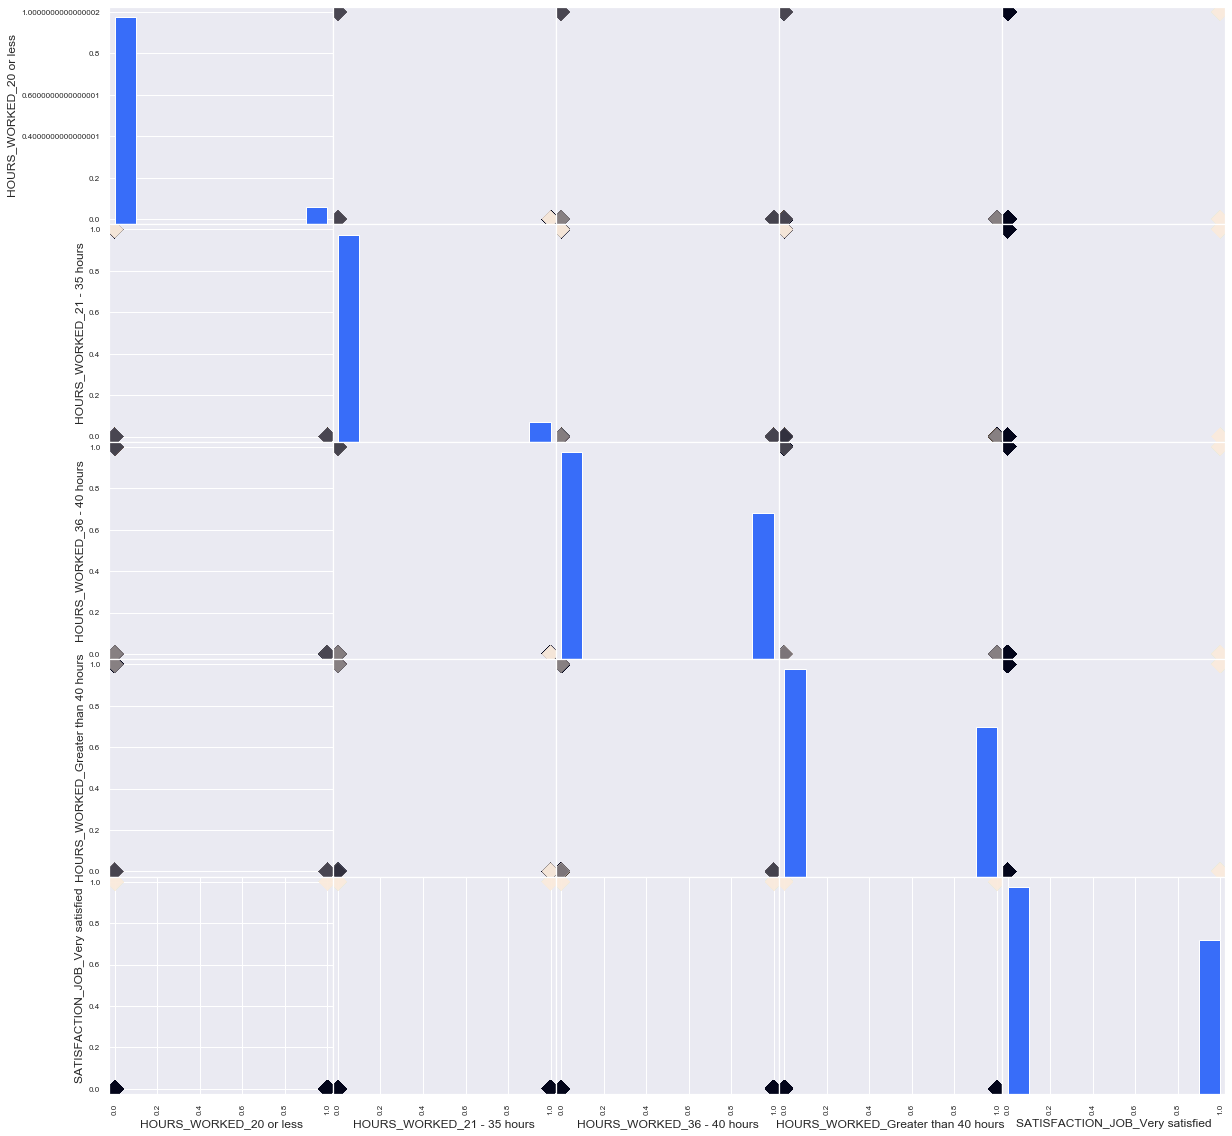

In [181]:
hoursee = pd.plotting.scatter_matrix(hours, c=yhours, figsize=[20,20], s=150, marker = 'D')

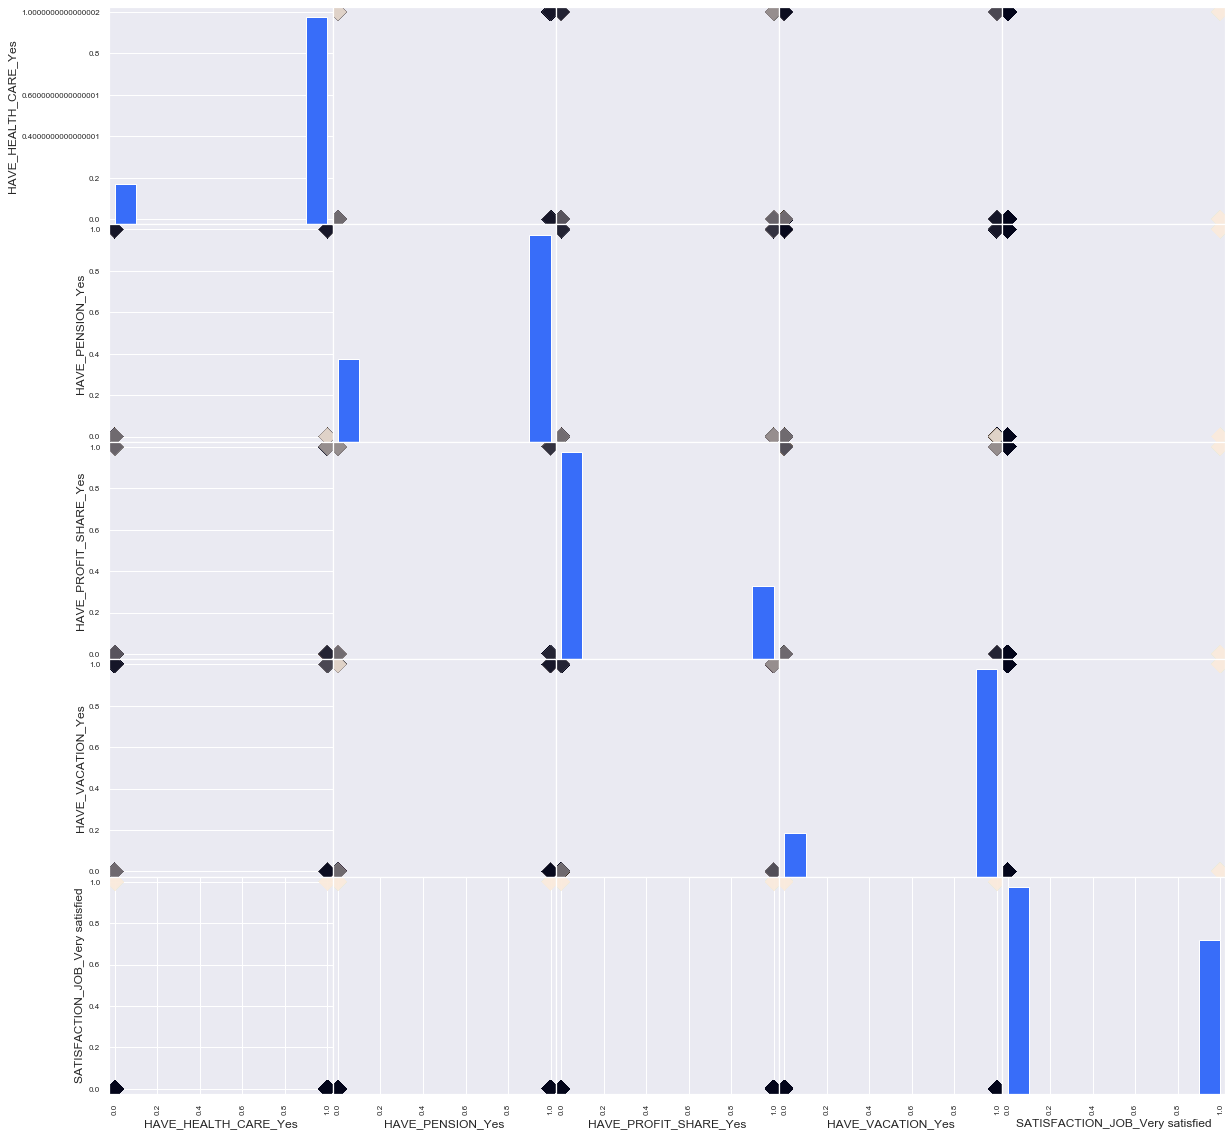

In [182]:
havesyesme = pd.plotting.scatter_matrix(havesyes, c=yhavesyes, figsize=[20,20], s=150, marker = 'D')

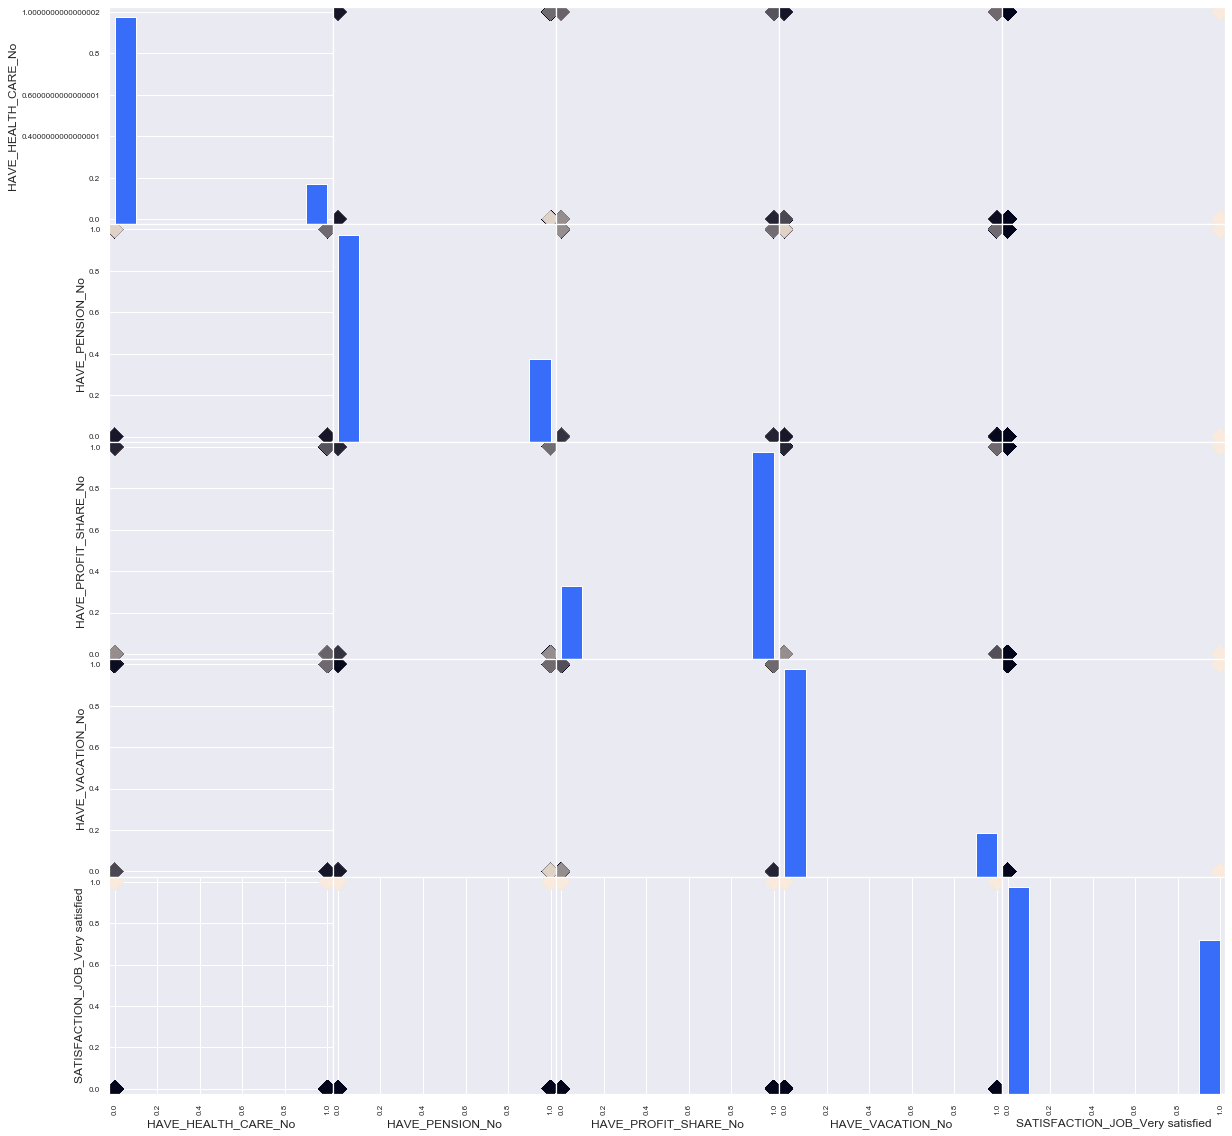

In [183]:
havesnome = pd.plotting.scatter_matrix(havesno, c=yhavesno, figsize=[20,20], s=150, marker = 'D')

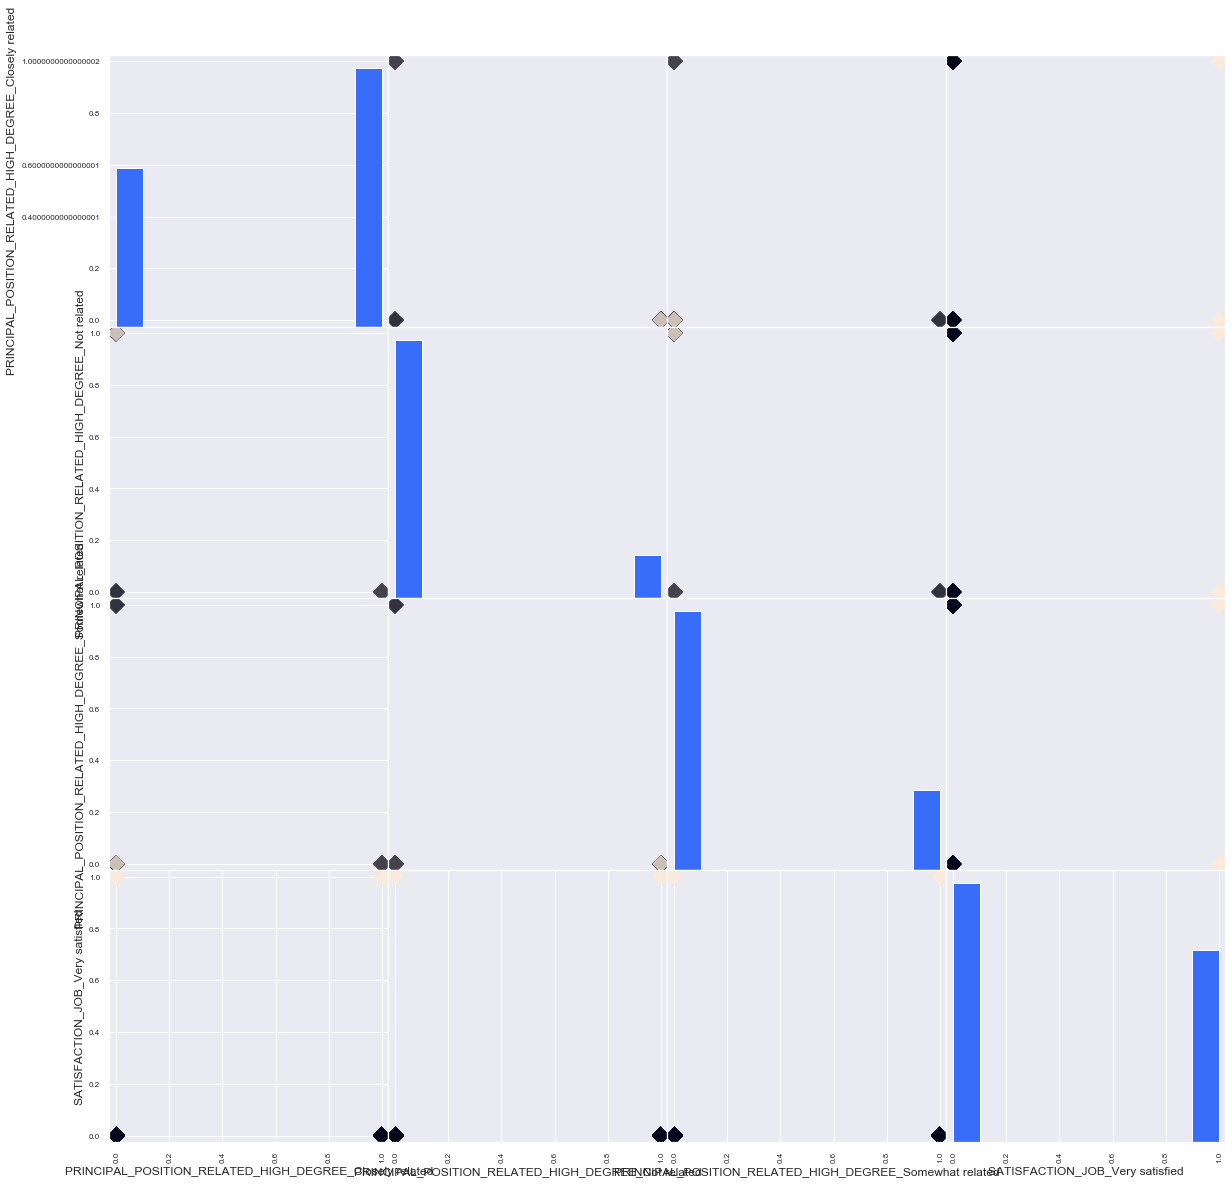

In [184]:
degreeuseme = pd.plotting.scatter_matrix(degreeuse, c=ydegreeuse, figsize=[20,20], s=150, marker = 'D')

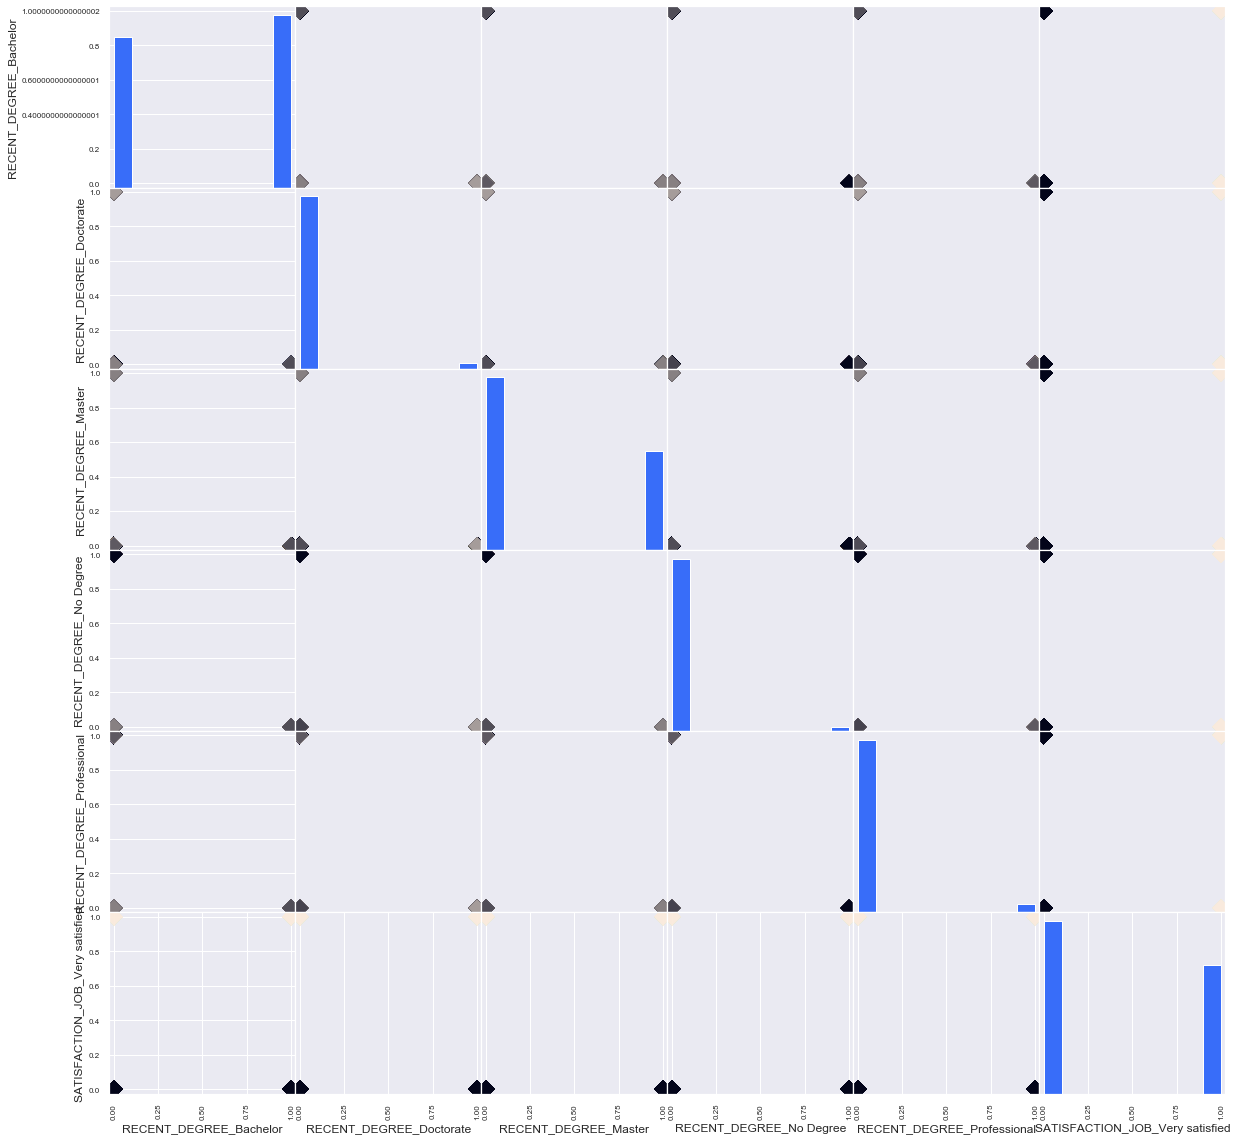

In [185]:
degreeme = pd.plotting.scatter_matrix(degree, c=ydegree, figsize=[20,20], s=150, marker = 'D')

In [186]:
alldata.columns

Index(['REFID', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRS

In [187]:
datasetone = alldata[['SATISFACTION_JOB','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE','RECENT_DEGREE']]

In [188]:
datasetone.sample(2)

,SATISFACTION_JOB,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,RECENT_DEGREE
38889,Somewhat satisfied,Yes,Yes,Yes,Yes,Closely related,Master
28210,Somewhat satisfied,Yes,Yes,No,Yes,Not related,Master


In [189]:
datasettwo = alldata[['SATISFACTION_JOB_CONTRIB_SOCIETY','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE','RECENT_DEGREE']]

In [190]:
datasettwo.sample(2)

,SATISFACTION_JOB_CONTRIB_SOCIETY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,RECENT_DEGREE
25877,Somewhat satisfied,Yes,Yes,No,Yes,Somewhat related,Master
970,Somewhat satisfied,Yes,Yes,No,Yes,Closely related,No Degree


In [191]:
satisfactionjob = pd.get_dummies(datasetone)

In [192]:
satisfactionsociety = pd.get_dummies(datasettwo)

In [193]:
satisfactionjob.sample(2)

,SATISFACTION_JOB_Somewhat dissatisfied,SATISFACTION_JOB_Somewhat satisfied,SATISFACTION_JOB_Very dissatisfied,SATISFACTION_JOB_Very satisfied,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,RECENT_DEGREE_Bachelor,RECENT_DEGREE_Doctorate,RECENT_DEGREE_Master,RECENT_DEGREE_No Degree,RECENT_DEGREE_Professional
52976,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0
46415,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0


In [194]:
satisfactionjob.columns

Index(['SATISFACTION_JOB_Somewhat dissatisfied', 'SATISFACTION_JOB_Somewhat satisfied', 'SATISFACTION_JOB_Very dissatisfied', 'SATISFACTION_JOB_Very satisfied', 'HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional'], dtype='object')

In [195]:
satjob = satisfactionjob[['SATISFACTION_JOB_Very satisfied','HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional']]

In [196]:
satisfactionsociety.sample(2)

,SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat dissatisfied,SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied,SATISFACTION_JOB_CONTRIB_SOCIETY_Very dissatisfied,SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,RECENT_DEGREE_Bachelor,RECENT_DEGREE_Doctorate,RECENT_DEGREE_Master,RECENT_DEGREE_No Degree,RECENT_DEGREE_Professional
54012,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0
58609,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0


In [197]:
satisfactionsociety.columns

Index(['SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat dissatisfied', 'SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied', 'SATISFACTION_JOB_CONTRIB_SOCIETY_Very dissatisfied', 'SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied', 'HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional'], dtype='object')

In [198]:
societyjob = satisfactionsociety[['SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied', 'HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional']]

In [199]:
satjob.sample(2)

,SATISFACTION_JOB_Very satisfied,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,RECENT_DEGREE_Bachelor,RECENT_DEGREE_Doctorate,RECENT_DEGREE_Master,RECENT_DEGREE_No Degree,RECENT_DEGREE_Professional
6140,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0
230,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [200]:
societyjob.sample(2)

,SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,RECENT_DEGREE_Bachelor,RECENT_DEGREE_Doctorate,RECENT_DEGREE_Master,RECENT_DEGREE_No Degree,RECENT_DEGREE_Professional
17566,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
13089,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0


In [201]:
ysatjob = satjob['SATISFACTION_JOB_Very satisfied']

In [202]:
ysocietyjob = societyjob['SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied']

In [203]:
#satnew = pd.plotting.scatter_matrix(satjob, c=ysatjob, figsize=[50,50], s=200, marker = 'D')

In [204]:
#societynew = pd.plotting.scatter_matrix(societyjob, c=ysocietyjob, figsize=[50,50], s=200, marker = 'D')

In [205]:
satjob.corr()

,SATISFACTION_JOB_Very satisfied,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,RECENT_DEGREE_Bachelor,RECENT_DEGREE_Doctorate,RECENT_DEGREE_Master,RECENT_DEGREE_No Degree,RECENT_DEGREE_Professional
SATISFACTION_JOB_Very satisfied,1.000000,-0.022798,0.022798,-0.052036,0.052036,-0.060762,0.060762,-0.016759,0.016759,0.145389,-0.105140,-0.079513,-0.047816,0.014958,0.023456,-0.023399,0.063776
HAVE_HEALTH_CARE_No,-0.022798,1.000000,-1.000000,0.541507,-0.541507,0.191710,-0.191710,0.658824,-0.658824,-0.105695,0.159782,-0.010680,0.018207,-0.031610,-0.033903,0.018057,0.047675
HAVE_HEALTH_CARE_Yes,0.022798,-1.000000,1.000000,-0.541507,0.541507,-0.191710,0.191710,-0.658824,0.658824,0.105695,-0.159782,0.010680,-0.018207,0.031610,0.033903,-0.018057,-0.047675
HAVE_PENSION_No,-0.052036,0.541507,-0.541507,1.000000,-1.000000,0.229248,-0.229248,0.530495,-0.530495,-0.065328,0.118865,-0.023122,0.006999,-0.010404,-0.015215,-0.019552,0.040655
HAVE_PENSION_Yes,0.052036,-0.541507,0.541507,-1.000000,1.000000,-0.229248,0.229248,-0.530495,0.530495,0.065328,-0.118865,0.023122,-0.006999,0.010404,0.015215,0.019552,-0.040655
HAVE_PROFIT_SHARE_No,-0.060762,0.191710,-0.191710,0.229248,-0.229248,1.000000,-1.000000,0.202731,-0.202731,0.004452,0.028480,-0.028482,-0.063235,0.038002,0.034977,0.030843,0.016388
HAVE_PROFIT_SHARE_Yes,0.060762,-0.191710,0.191710,-0.229248,0.229248,-1.000000,1.000000,-0.202731,0.202731,-0.004452,-0.028480,0.028482,0.063235,-0.038002,-0.034977,-0.030843,-0.016388
HAVE_VACATION_No,-0.016759,0.658824,-0.658824,0.530495,-0.530495,0.202731,-0.202731,1.000000,-1.000000,-0.061376,0.130003,-0.036784,-0.018181,0.001458,-0.006013,-0.018567,0.068687
HAVE_VACATION_Yes,0.016759,-0.658824,0.658824,-0.530495,0.530495,-0.202731,0.202731,-1.000000,1.000000,0.061376,-0.130003,0.036784,0.018181,-0.001458,0.006013,0.018567,-0.068687
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,0.145389,-0.105695,0.105695,-0.065328,0.065328,0.004452,-0.004452,-0.061376,0.061376,1.000000,-0.521156,-0.712889,-0.221218,0.084602,0.129878,0.047913,0.122776


In [206]:
societyjob.corr()

,SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied,HAVE_HEALTH_CARE_No,HAVE_HEALTH_CARE_Yes,HAVE_PENSION_No,HAVE_PENSION_Yes,HAVE_PROFIT_SHARE_No,HAVE_PROFIT_SHARE_Yes,HAVE_VACATION_No,HAVE_VACATION_Yes,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related,RECENT_DEGREE_Bachelor,RECENT_DEGREE_Doctorate,RECENT_DEGREE_Master,RECENT_DEGREE_No Degree,RECENT_DEGREE_Professional
SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied,1.000000,0.026389,-0.026389,-0.009008,0.009008,0.049838,-0.049838,0.031080,-0.031080,0.187402,-0.134169,-0.103603,-0.099815,0.042419,0.060050,-0.031411,0.086196
HAVE_HEALTH_CARE_No,0.026389,1.000000,-1.000000,0.541507,-0.541507,0.191710,-0.191710,0.658824,-0.658824,-0.105695,0.159782,-0.010680,0.018207,-0.031610,-0.033903,0.018057,0.047675
HAVE_HEALTH_CARE_Yes,-0.026389,-1.000000,1.000000,-0.541507,0.541507,-0.191710,0.191710,-0.658824,0.658824,0.105695,-0.159782,0.010680,-0.018207,0.031610,0.033903,-0.018057,-0.047675
HAVE_PENSION_No,-0.009008,0.541507,-0.541507,1.000000,-1.000000,0.229248,-0.229248,0.530495,-0.530495,-0.065328,0.118865,-0.023122,0.006999,-0.010404,-0.015215,-0.019552,0.040655
HAVE_PENSION_Yes,0.009008,-0.541507,0.541507,-1.000000,1.000000,-0.229248,0.229248,-0.530495,0.530495,0.065328,-0.118865,0.023122,-0.006999,0.010404,0.015215,0.019552,-0.040655
HAVE_PROFIT_SHARE_No,0.049838,0.191710,-0.191710,0.229248,-0.229248,1.000000,-1.000000,0.202731,-0.202731,0.004452,0.028480,-0.028482,-0.063235,0.038002,0.034977,0.030843,0.016388
HAVE_PROFIT_SHARE_Yes,-0.049838,-0.191710,0.191710,-0.229248,0.229248,-1.000000,1.000000,-0.202731,0.202731,-0.004452,-0.028480,0.028482,0.063235,-0.038002,-0.034977,-0.030843,-0.016388
HAVE_VACATION_No,0.031080,0.658824,-0.658824,0.530495,-0.530495,0.202731,-0.202731,1.000000,-1.000000,-0.061376,0.130003,-0.036784,-0.018181,0.001458,-0.006013,-0.018567,0.068687
HAVE_VACATION_Yes,-0.031080,-0.658824,0.658824,-0.530495,0.530495,-0.202731,0.202731,-1.000000,1.000000,0.061376,-0.130003,0.036784,0.018181,-0.001458,0.006013,0.018567,-0.068687
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related,0.187402,-0.105695,0.105695,-0.065328,0.065328,0.004452,-0.004452,-0.061376,0.061376,1.000000,-0.521156,-0.712889,-0.221218,0.084602,0.129878,0.047913,0.122776


In [207]:
satjobcolumns = satjob.columns

In [208]:
societyjobcolumns = societyjob.columns

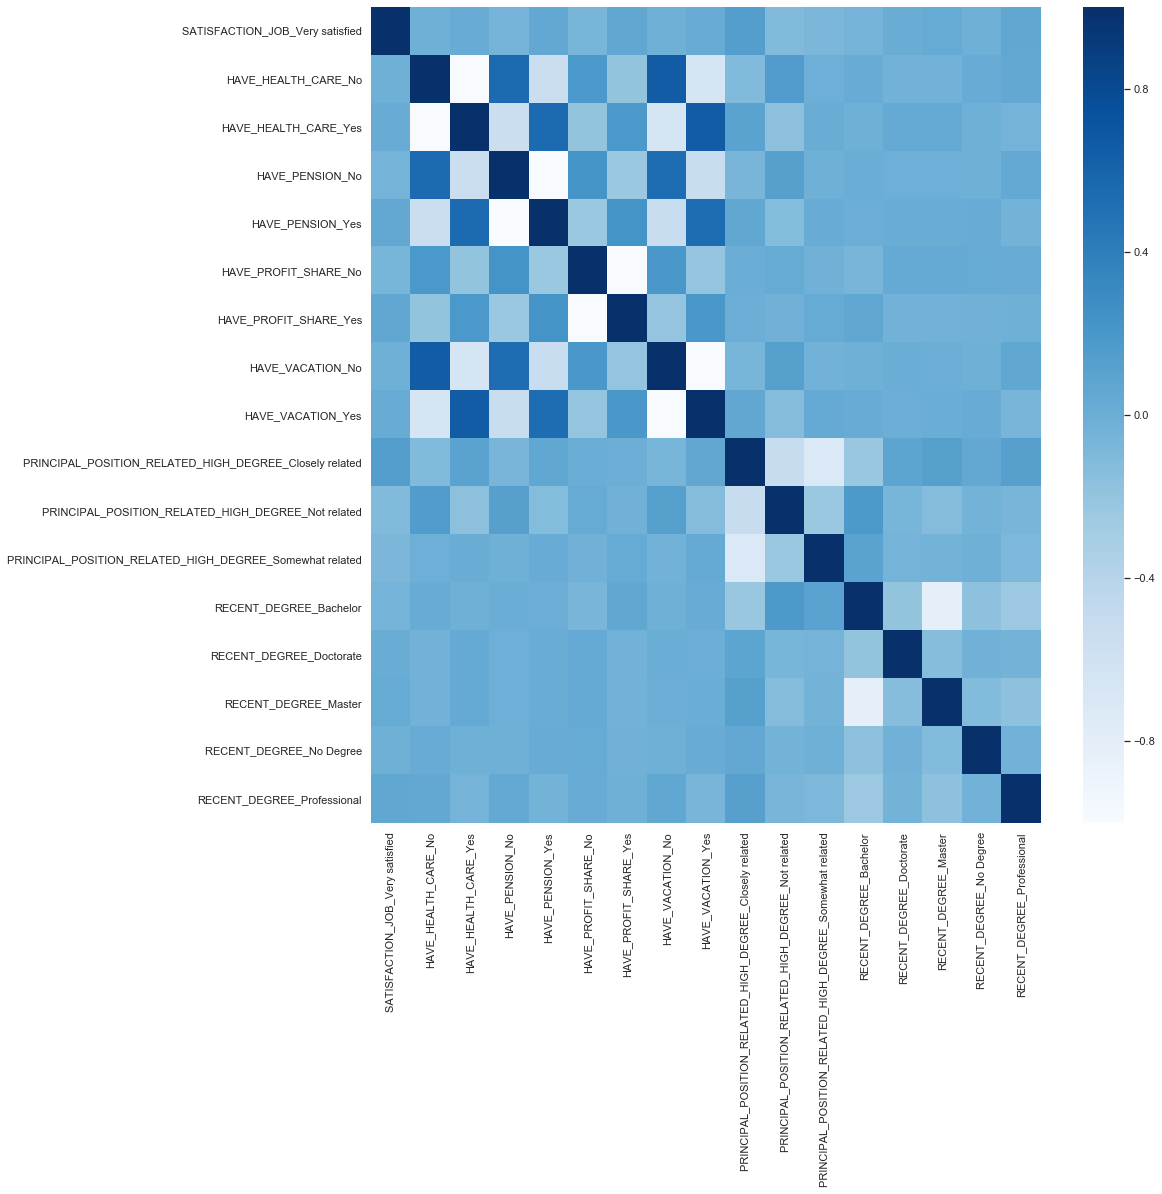

In [209]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(satjob.corr(), center=0, cmap='Blues')

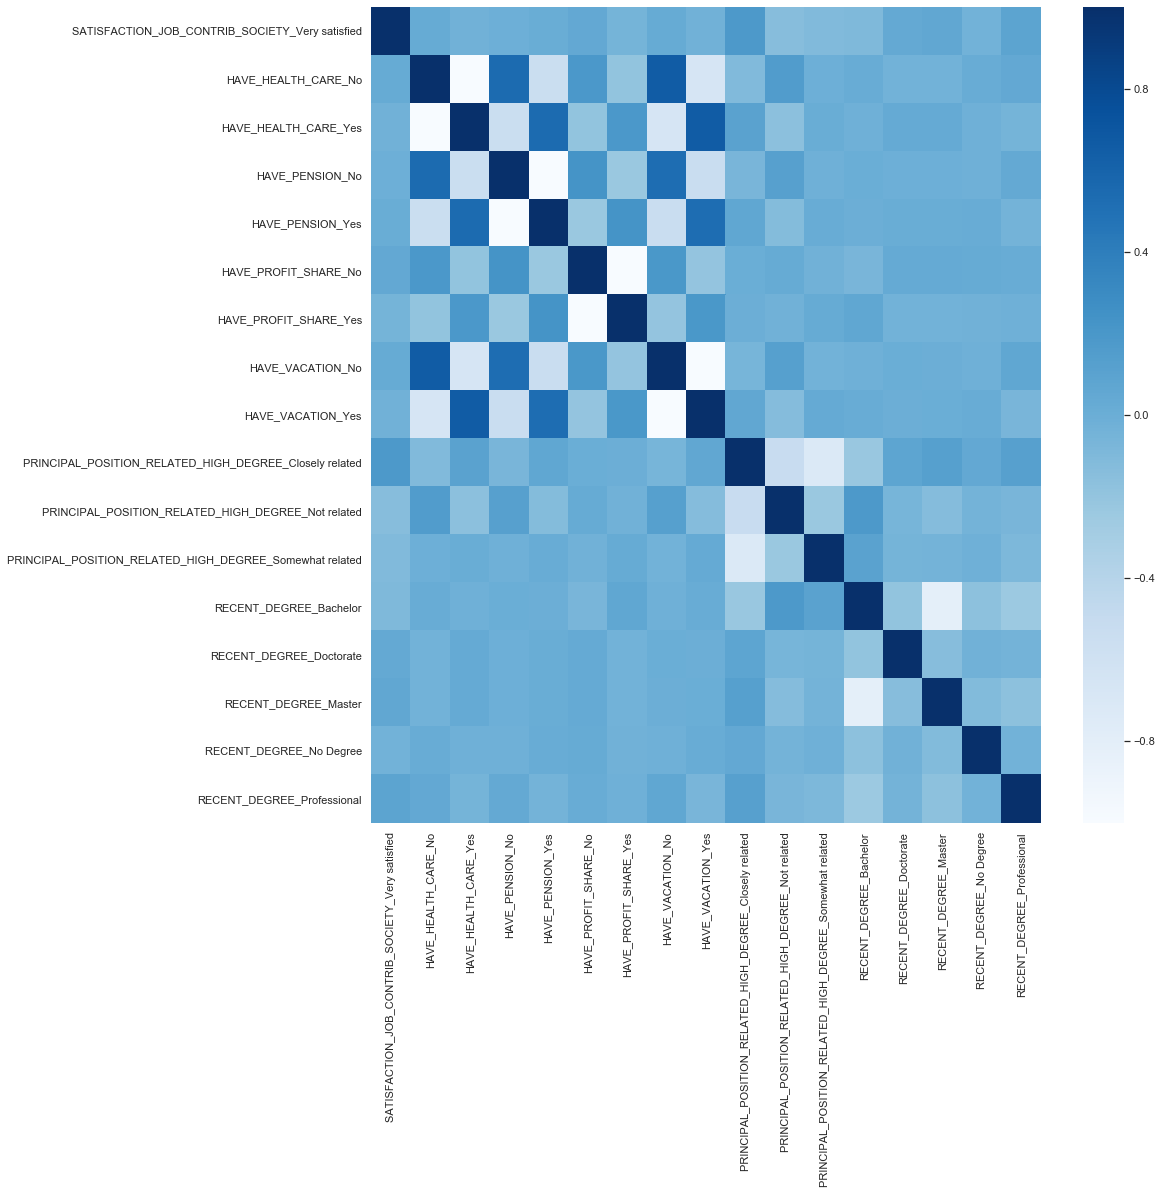

In [210]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(societyjob.corr(), center=0, cmap='Blues')

In [211]:
satjobcolumns

Index(['SATISFACTION_JOB_Very satisfied', 'HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional'], dtype='object')

In [212]:
societyjobcolumns

Index(['SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied', 'HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional'], dtype='object')

In [213]:
satjob_feature_names = ['HAVE_HEALTH_CARE_No', 'HAVE_HEALTH_CARE_Yes', 'HAVE_PENSION_No', 'HAVE_PENSION_Yes', 'HAVE_PROFIT_SHARE_No', 'HAVE_PROFIT_SHARE_Yes', 'HAVE_VACATION_No', 'HAVE_VACATION_Yes', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Closely related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Not related', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE_Somewhat related', 'RECENT_DEGREE_Bachelor', 'RECENT_DEGREE_Doctorate', 'RECENT_DEGREE_Master', 'RECENT_DEGREE_No Degree', 'RECENT_DEGREE_Professional']

In [214]:
X = satjob[satjob_feature_names]
y = satjob['SATISFACTION_JOB_Very satisfied']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.59
Accuracy of Logistic regression classifier on test set: 0.59


In [219]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.59
Accuracy of Decision Tree classifier on test set: 0.58


In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.56


In [221]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.59
Accuracy of LDA classifier on test set: 0.59


C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [222]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.57
Accuracy of GNB classifier on test set: 0.57


In [223]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.59
Accuracy of SVM classifier on test set: 0.59


In [224]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5719 3106]
 [3802 2967]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      8825
           1       0.49      0.44      0.46      6769

    accuracy                           0.56     15594
   macro avg       0.54      0.54      0.54     15594
weighted avg       0.55      0.56      0.55     15594



In [225]:
alldata.columns

Index(['REFID', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRS

In [278]:
export_csv = alldata.to_csv(r'C:\Users\Naeemah\Desktop\alldata.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [275]:
alldatause = alldata[['AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON', 'WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE', 'WORK_OUTSIDE_DEGREE_FOR_WORK_COND', 'WORK_OUTSIDE_DEGREE_FOR_FAMILY', 'WORK_OUTSIDE_DEGREE_FOR_LOC', 'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL', 'WORK_OUTSIDE_DEGREE_FOR_OTHER', 'WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE', 'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'ATTEND_TRAINING_WORK_RELATE', 'ATTEND_TRAINING', 'ATTEND_TRAINING_CHANGE_FIELD', 'ATTEND_TRAINING_BY_EMPLOYER', 'ATTEND_TRAINING_CERT', 'ATTEND_TRAINING_INCREASE_ADV_CUR', 'ATTEND_TRAINING_OTHER', 'ATTEND_TRAINING_PERSONAL', 'ATTEND_TRAINING_ACQUIRE_SKILL', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES', 'RECENT_DEGREE',
       'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

In [276]:
export_csv = alldatause.to_csv (r'C:\Users\Naeemah\Desktop\alldatause.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [227]:
# retrieve numpy array
mydata = alldatause.values

In [228]:
mydata

array([[37, 'Male', 'No', ..., 'No', 'No', 'No'],
       [44, 'Male', 'No', ..., 'No', 'No', 'No'],
       [51, 'Male', 'No', ..., 'No', 'No', 'No'],
       ...,
       [30, 'Male', 'Yes', ..., 'No', 'No', 'No'],
       [41, 'Male', 'No', ..., 'No', 'No', 'No'],
       [31, 'Male', 'No', ..., 'No', 'No', 'No']], dtype=object)

In [229]:
#load the dataset 
def load_dataset(filename):
    data = read_csv(filename, header=None)
    dataset = data.values
    X = dataset[:, -1]
    y = dataset[:, -1]
    X = X.astype(str)
    return X, y

In [230]:
#prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [231]:
#prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [232]:
#feature selection -- Chi-Squared Feature Selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [233]:
X = mydata[:, :-1]
y = mydata[:,-1]

In [234]:
X = X.astype(str)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [236]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (41789, 88) (41789,)
Test (20584, 88) (20584,)


In [237]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [238]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [239]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Features 0: 10709.129881
Features 1: 2.254912
Features 2: 0.792793
Features 3: 21.578448
Features 4: 13.276894
Features 5: 31.194426
Features 6: 55.785894
Features 7: 300.543454
Features 8: 68.161095
Features 9: 322.365108
Features 10: 16.749494
Features 11: 132.054903
Features 12: 108.732468
Features 13: 40.951659
Features 14: 127.291035
Features 15: 23.542850
Features 16: 34.824500
Features 17: 236.410630
Features 18: 384.677945
Features 19: 690.555000
Features 20: 419.416983
Features 21: 220.562805
Features 22: 216.915454
Features 23: 2.313875
Features 24: 0.261821
Features 25: 242.618007
Features 26: 372.649203
Features 27: 344.391094
Features 28: 930.680462
Features 29: 156.254850
Features 30: 8.287391
Features 31: 22.048321
Features 32: 27.245981
Features 33: 35.821235
Features 34: 4.107207
Features 35: 9.635145
Features 36: 91.925895
Features 37: 213.098627
Features 38: 121.130387
Features 39: 180.347212
Features 40: 144.110935
Features 41: 258.126029
Features 42: 633.976660
Fea

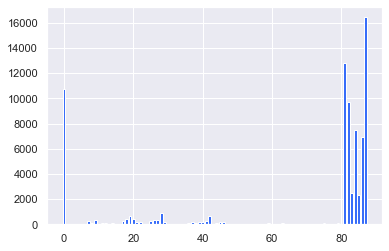

In [240]:
#what are scores for the features
for i in range(len(fs.scores_)):
    print('Features %d: %f' % (i, fs.scores_[i]))
    
#plot the scores 
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [241]:
# feature selection - Mutual Information Feature Selection
def select_featuresm(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [242]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [243]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [244]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [245]:
# feature selection
X_train_fs, X_test_fs, fs = select_featuresm(X_train_enc, y_train_enc, X_test_enc)

Feature 0: 0.021252
Feature 1: 0.002111
Feature 2: 0.001791
Feature 3: 0.005785
Feature 4: 0.005494
Feature 5: 0.008444
Feature 6: 0.007799
Feature 7: 0.004906
Feature 8: 0.007269
Feature 9: 0.021475
Feature 10: 0.007347
Feature 11: 0.008358
Feature 12: 0.003594
Feature 13: 0.009761
Feature 14: 0.003722
Feature 15: 0.015390
Feature 16: 0.013789
Feature 17: 0.036117
Feature 18: 0.008425
Feature 19: 0.021688
Feature 20: 0.015096
Feature 21: 0.007901
Feature 22: 0.009395
Feature 23: 0.000000
Feature 24: 0.000458
Feature 25: 0.010076
Feature 26: 0.008617
Feature 27: 0.012200
Feature 28: 0.011589
Feature 29: 0.001254
Feature 30: 0.001669
Feature 31: 0.001855
Feature 32: 0.001265
Feature 33: 0.002868
Feature 34: 0.000481
Feature 35: 0.001860
Feature 36: 0.003464
Feature 37: 0.004858
Feature 38: 0.003441
Feature 39: 0.004402
Feature 40: 0.001127
Feature 41: 0.005875
Feature 42: 0.010230
Feature 43: 0.000334
Feature 44: 0.003493
Feature 45: 0.006488
Feature 46: 0.005458
Feature 47: 0.008257
Fe

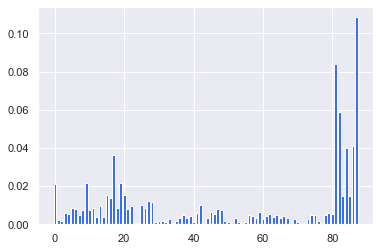

In [246]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Model Built Using All Features LOGISTIC REGRESSION

In [247]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [248]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 95.91


C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [249]:
# feature selection
def select_featuresmodel(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=9)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs


In [250]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [251]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [252]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [253]:
# feature selection
X_train_fs, X_test_fs = select_featuresmodel(X_train_enc, y_train_enc, X_test_enc)

In [254]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
# evaluate the model
yhat = model.predict(X_test_fs)
yhat2 = model.predict_proba(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print(yhat)
print(yhat2)

Accuracy: 95.58
[0 0 0 ... 0 0 0]
[[0.99527148 0.00472852]
 [0.99312257 0.00687743]
 [0.99657209 0.00342791]
 ...
 [0.99125409 0.00874591]
 [0.99293629 0.00706371]
 [0.99563666 0.00436334]]


Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.
How to evaluate the importance of categorical features using the chi-squared and mutual information statistics.
How to perform feature selection for categorical data when fitting and evaluating a classification model.

# Decision tree for classification


In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [263]:
alldatause.head(2)

,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
0,37,Male,No,Asian,Not in the US,No,None,One child,36 - 40 hours,"$80,000.00",Yes,Yes,No,Yes,Closely related,Physicists and astronomers,Physical and related scientists,4 year college or medical institution,100-499 employees,Applied research,Research and Development,Management and Administration,Management and Administration,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,No,Yes,3 memberships,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,No,Other,No,No,No,No,No,No,No,Yes,No,No,No Degree,Physics and astronomy,Physical and related sciences,No,No,No,No,No,No,No,No
1,44,Male,No,White,Not in the US,No,None,Two or more children,Greater than 40 hours,"$83,000.00",Yes,Yes,No,Yes,Closely related,Physicists and astronomers,Physical and related scientists,Non-US government,5000-24999 employees,Management and Administration,Management and Administration,"Computer applications, programming, systems de...",Research and Development,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No memberships,No,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Yes,To facilitate a change in occupation field,No,Yes,No,No,No,No,Yes,Yes,No,Yes,No Degree,NaN,Physical and related sciences,No,No,No,No,No,No,No,No


In [264]:
treeme = alldatause.values

In [265]:
treeme

array([[37, 'Male', 'No', ..., 'No', 'No', 'No'],
       [44, 'Male', 'No', ..., 'No', 'No', 'No'],
       [51, 'Male', 'No', ..., 'No', 'No', 'No'],
       ...,
       [30, 'Male', 'Yes', ..., 'No', 'No', 'No'],
       [41, 'Male', 'No', ..., 'No', 'No', 'No'],
       [31, 'Male', 'No', ..., 'No', 'No', 'No']], dtype=object)

In [268]:
TX = treeme[:, -1]
Ty = treeme[:, -1]
TX = TX.astype(str)